# Lending Club Case Study

## Table of Contents

[Introduction](#Introduction) <br>
[Understanding](#Understanding) <br>
[Objectives](#Objectives) <br>

2.0[Setup](#2.0-Setup)<br>
>    2.1[Import_Libraries](#2.0.1-Import_Libraries)<br>
>    2.2[Reusable_Functions](#2.0.2-Reusable_Functions)<br>

## Introduction

Our company is one of the largest online loan marketplace, facilitating all purpose loans. The Borrowers can easily access lower interest rate loans through a fast online platform.
As a large consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

## Understanding

Two types of risks are associated with the company loan approval:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## Objectives

- Our aim of this case study is identifying risky loan applicants (defaulters) which will not repay the loan, then such loans can be reduced thereby cutting down the amount of risky loan applicants which represent a chance of loss to the company using explaratory data analysis.

- After idnetifying those variables the we will inform the company with the findings of analysis and understand the driving factors significant variables behind loan default.

- Then the company will be able to utilise this knowledge for its portfolio and credit risk assessment.

> Please make sure that both **loan.zip** and **Data_Dictionary.xlsx** files are present in the same folder as this notebook in order for the fie to run successfully

## 2.0 Setup

>### 2.0.1 Import_Libraries



In [381]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns # for visualization and data understanding
import matplotlib
import matplotlib.pyplot as plt # for visualization and data understanding
from datetime import datetime # To derive varibles from issue_date column
from tqdm import tqdm # thermometer
import missingno as mn # this library will be used for missingNa Analsysis
import plotly.express as px

# Printing the version of libraries used for reference:
print('numpy version:',np.__version__)
print('pandas version:',pd.__version__)
print('matplotlib: {}'.format(matplotlib.__version__))
print(sns.__version__)
print("Missingno Version : {}".format(mn.__version__))

numpy version: 1.21.5
pandas version: 1.4.2
matplotlib: 3.5.1
0.11.2
Missingno Version : 0.5.1


>###  2.0.2 Reusable_Functions

In [382]:
# use variable names which can be overwritten downstream

#Create a log array this will containt the log such as why a column was deleted etc
logList__=[]

#upper limit for same kind of dagta default to 55 can be changed
UperLimitForSameData__=55
#null value limit used 85 instead
nullsLineValue=60

def DropColumnsSameNumValues(df,lmt=UperLimitForSameData__):
    '''
    purpose: drop columns with most of the values are same
    df: dataframe
    lmt=Limit for the upper limit. If the values are same till that limit
    the whoole column will be deleted
    return list
    
    '''
    #get the list
    ls=getListColumnsSameNumValues(df,lmt)
    #delete the column
    DropColumnsUsinglist(df,ls,'most of the values are same')    
    return ls
def getListColumnsSameNumValues(df,lmt=UperLimitForSameData__):
    '''
    purpose: return the list of columns with most of the valures are same
    df: dataframe
    lmt=Limit for the upper limit. If the values are same till that limit
    the whoole column will be deleted
    returns list
    '''
#     get both numeric and non numeric columns
    numCols,ObjectCols=getNumObjectCols(df)
    #get the list
    ls=[c for c in numCols if df[c].min()==np.nanpercentile(df[c],lmt)]
#     return the list
    return ls

# Function to log why the columns was dropped.
def myLog(logvalue,reason=''):
    '''
    purpose: Log anything with a reason
    logvalue: this could be anything
    reason=this will be reason behind this action
    '''
#   Get the current date time      
    now = datetime.now()
#     Log
    logList__.append([f'{now}', logvalue,reason] )
# Show the reasons why every columns was dropped by the end of cleaning

def getLogDF():
    '''
    purpose: convert the list to a dataframe and return it
    return DataFrame
    '''
    return pd.DataFrame (logList__, columns = ['DateTime','Log','Reason'])
def showLog():
    '''
    purpose: convert the list to a dataframe and return it
    return DataFrame
    '''
    return getLogDF()
#these varaibles are being used in several functions below
# so moved here to avoid any typing mistakes
P__='percn' 
C__='ColName'
V__='value'
def ListColumnsWithNaN(df):
    '''
    purpose: get the percnetage of missing or NA values
    df: dataframe
    return DataFrame
    '''
    #get the percentaage
    dm=(100*df.isna().mean()).reset_index()
    # the values returned will have 0 as column name so fix it
    df2 = dm.set_axis([C__, P__], axis=1, inplace=False)
    #now retuen the data
    return df2
def ListColumnsWithAllNaN(df):
    '''
    purpose: return the columns with all values are NA
    df: dataframe
    return columns with any values are NA
    '''
    df2=ListColumnsWithNaN(df)
    #return only those columns where all values are NAN
    return df2 [df2[P__]==100]


def ListColumnsWithAnyNaN(df):  
    '''
    purpose: return the columns with any values  NA
    df: dataframe
    return columns with any values are NA
    '''
    df2=ListColumnsWithNaN(df)
     #return  those columns where any values are NAN
    return df2 [df2[P__]>0]

def ListColumnsWithAnyNaNSorted(df):  
    '''
    purpose: return the columns with any values  NA and sorted
    df: dataframe
    return columns with any values are NA sorted
    '''
    df2=ListColumnsWithAnyNaN(df)
     #return  those columns where any values are NAN
    return df2.sort_values(by=P__,ascending=False)


def ListColumnsWithAnyNaNDesc(df):
    '''
    purpose: return the columns with in descending order
    df: dataframe
    return columns with any values are NA in descending order
    '''
    df2=ListColumnsWithNaN(df)
    #return  those columns where any 
    #values are NAN and sort by percnt descending
    
    return df2.sort_values(P__, ascending=False)
def getListofObjectColumns(df):
    '''
    purpose: return the columns list of type object
    df: dataframe
    return list
    '''

    return list(df.head(1).select_dtypes(include=['object']).T\
         .reset_index()['index'])
def getListofNumberColumns(df):
    '''
    purpose: return the columns list of numeric columns
    df: dataframe
    return list
    '''

    numerics = ['int16', 'int32', 'int64','float64']
    return df.head(1).select_dtypes(include=numerics).T\
         .reset_index()['index'].tolist()

def showNANMatrix(df):
    '''
    purpose: abstraction laywer to show matrix for nan values
    df: dataframe
    '''

    mn.matrix(df,labels=True,)
def ColumnsWithAnyPGE(df,prcnt=nullsLineValue): 
    '''
    purpose: columns with NA > given prcnt 
    df: dataframe
    prcnt: limit for percentage
    return dataframe
    '''
    df2=ListColumnsWithNaN(df)
     #return  those columns where any values are NAN
    return df2 [df2[P__]>=prcnt]


def ListColumnsWithPGE(df,prcnt=nullsLineValue):  
    '''
    purpose: list columns wiht nan Perctage is greatre than or equal ot prcnt
    df: dataframe
    prcnt: limit for percentage
    return list
    '''

    return ColumnsWithAnyPGE(df,prcnt)[C__].tolist()
def DeleteColumn(df,cName,reason):

    '''
    purpose: Delete column if exists
    
    df: dataframe
    cName: column name
    reason: reason why that column is being deleted. this will be logged
    
    return None
    '''

    if cName in df.columns: # if column exists to avoid exception
        #delete
        del df[cName]
        #log
        myLog(f'Deleting column {cName}',reason)
def DropColumnsWithAllNan(df):
    
    '''
    purpose: Delete column with all Nan values
    
    df: dataframe
      
    return None
    '''

    # cannot use dropna as we have to log the data as well
#     ret=df.dropna(axis='columns',how='all')
    ls=ListColumnsWithAllNaN(df)[C__].tolist()
    #now drop
    DropColumnsUsinglist(df,ls,'All values are NaN')
def DropColumnsWithNANGreaterthanlimit(df,prcnt):
    
    '''
    purpose: Delete column with  Nan greater than prcnt
    
    df: dataframe
    prcnt: percentage
      
    return None
    '''

    DropColumnsUsinglist(df,ListColumnsWithPGE(df,prcnt),'Most of the vlaues are null')

def DropColumnsUsinglist(pDf,ls,reason):
    '''
    purpose: Delete column in the list
    
    PDf: dataframe
    ls: list of columns
    reason: reason
      
    return None
    '''
    for c in ls:
        DeleteColumn(pDf,c,reason)
def DropColumnsWithOnlyOneValue(df):     
    '''
    purpose: Delete columns with only one value
    
    df: dataframe
    return None
    '''

    [DeleteColumn(df,c,'Column with only one value') \
          for c in getColumnsWithOnlyOneValue(df)]
           
def getColumnsWithOnlyOneValue(df):
    '''
    purpose: return the list of columns with only one value
    
    df: dataframe
    return None
    '''

    return [c for c in df.columns if df[c].value_counts().count()==1]

def showBoxSubPlots(df):
    '''
    purpose: show boxs sub plots using the dataframe
    
    df: dataframe
    return None
    '''

    #get the numeric columns
    NumCols,CatCols=getNumObjectCols(df)
#     shw the plot
    showBoxSubPlotsUsingList(df,NumCols)
    
def showBoxSubPlotsUsingList(df,ls,figs=(20,16)):
    '''
    purpose: show boxs sub plots using the list
    
    df: dataframe
    ls: list of numeric columns
    figs=(20,16) default figure size
    return None
    '''
   
    plt.figure(figsize=figs)
    ln=len(ls)
    cols=4
    rows=(ln//cols)+1
    #show thermometer
    for i in tqdm( range(ln)):
        c=ls[i]
        plt.subplot(rows,cols,i+1)
        #plot
        df[c].plot(kind='box',title=f'Plot for {c}')

def getOutliers(df,c):
    '''
    purpose: get Outliers
    
    df: dataframe
    c: name of the column
    return tuple of outliers, the sise and percentage
    '''
    #calculate upper and lower whiskers
    data=df[c]
    median = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
    lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
    outliers=((df[c]< lower_whisker) | (df[c]>upper_whisker))
#     return the data
    return outliers,df[outliers].shape[0], 100*df[outliers].shape[0]/df.shape[0]


        
def RemoveOutlier(df,c):
    '''
    purpose: remove Outliers
    
    df: dataframe
    c: name of the column
    return dataframe
    '''
    outliers,cnt,prcnt=getOutliers(df,c)
    df=df[~outliers].copy()
    return df


def SetMissingToMaxValue(df,colName):
    '''
    purpose: set missing values to the max or mode value 
    
    df: dataframe
    colName: name of the column
    return nothing
    '''
    #get the maximum value
    maxv=df[colName].value_counts().reset_index().loc[0][0]
    SetMissingToGivenValue(df,colName,maxv)
    

def SetMissingToGivenValue (df,colName,value):
    '''
    purpose: set missing values to the the given value 
    
    df: dataframe
    colName: name of the column
    value: given value to be replaced for NA
    return nothing
    '''
    df[colName].fillna(value, inplace = True)

from IPython.display import Markdown, display
def printmd(string):
    '''
    purpose: print string as markdown 
    
    string: string to display
     return nothing
    '''

    display(Markdown(string))
    

def RemoveOutliers(df,excludelist=[]):
    '''
    purpose: remove outliers and leave behind columns in excludelist
    df: dataframe
    excludelist: columns which will not be processed
     return nothing
    '''

    NumCols,CatCols=getNumObjectCols(df)
    for c in NumCols:
        if c not in excludelist:
            df=RemoveOutlier(df,c)
    return df
from IPython.display import display_html
from itertools import chain,cycle
def displaySideBySide(*args,Titles=cycle([''])):
    
    '''
    purpose: display tables side by side
    *args: array of arguments
    Titles: Itertools for titles
      return nothing
    '''

    html=''
    #loop through args and titles and zip them togethre
    for df,title in zip(args, chain(Titles,cycle(['</br>'])) ):
        #create the table header 
        html+='<th style="text-align:center"><td style="vertical-align:top">'
        #display the heading
        html+=f'<h2 style="text-align: center;">{title}</h2>'
        #apply the style to the table
        html+=df.to_html().replace('table','table style="display:inline"')
        #clsoing tags
        html+='</td></th>'
    #dispay the html    
    display_html(html,raw=True)

def getObjectsWihtAnyMissingValue(df,prcnt=1):
    
    '''
    purpose: return the list of columns with missing percnt is <=prnct
    df: dataframe
    prcnt: percentage
    return the dataframe
    '''

    cnts=ListColumnsWithAnyNaN(df).round(2)
    return cnts[cnts.percn<=prcnt]
def getDescription(keyName):
   
    '''
    purpose: Get the description of a column
    keyNames: column name
    return the description
    '''
    #if not found in dictionary it's mean it is a calculated field
    retval=['Calculated Field']
    
    if keyName in dtDict__.keys():
        retval=dtDict__[keyName]
    return retval
def displayDescription(keyNames):
   
    '''
    purpose: displayDescription
    keyNames: column name

    return nothing
    '''

    [printmd(f'<b>{c}</b>: {getDescription(c)[0]}') for c in keyNames]



def getNumObjectCols(df):
  
    '''
    purpose: return the numeric and object columns as a tuple
    df: dataframe

    return the numeric and object columns as a tuple
    '''

    objtypes=['object','category']
    NumCols=[c for c in df.columns if df[c].dtype.name not in objtypes ]
    CatCols=[c for c in df.columns if df[c].dtype.name in objtypes ]
    return NumCols,CatCols
def drawplotly(pDf,pPath,pValueFieldName, pColorBasedOn,pHoverData):
  
    '''
    purpose: Draw a treemap and show the heat
    pDf: dataframe
    pPath: the hierarchy to be displayed this could be like country,state,zip
    pValueFieldName: The size of the box will be based on this column
    pColorBasedOn: the color of the box will be based on this column
    pHoverData: when we hover the mouse this will be dispalyed along with other columns

    return nothing
    '''
    fig = px.treemap(pDf, 
                      path=pPath, 
                      values=pValueFieldName,
                      color=pColorBasedOn, 
                      color_continuous_scale='Turbo',
                      hover_data=[pHoverData],
                      color_continuous_midpoint=np.average(pDf[pColorBasedOn], 
                      weights=pDf[pValueFieldName]))
    #define margin
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    #update layout
    fig.update_layout(
        autosize=True,
        height=800,
        showlegend=False
    )
    fig.show()

def UnivariantAnalysis(df,colName,xlabel,ylabel ):
 
    '''
    purpose: create box and kde plots side by side for univariant analysis
    df: dataframe
    colName: the name of the column
    xlabel:xlabel in the plot also will be used in title
    ylable for the ylable of the plot will be removed
    
    return nothing
    '''

    col=df[colName]

      
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    col.plot(kind='kde',title=f'KDE for {xlabel}',ax=ax1)

    col.plot(kind='box',title=f'Boxplot for {xlabel}',ax=ax2)
    ax2.set_xlabel=xlabel
    plt.show()

    print(f'\nmedian\t  {col.median()}')
    print(col.describe().round(2))


ylbl='# of Loans'

# Plot pie and Countplot for 1 variable.
def ShowPieAndCountPlot(df,colName,xlabel,ylabel=ylbl,fsize=(8,6),angl=0):
    '''
    This function shows the countplot
    df: dataframe
    colName: the name of the column
    xlabel=xlabel of the plot
    ylabel=ylabel of the plot
    fsize=figure size
    return value: none
    '''
    ShowCountPlot(dfinit,colName,xlabel,fsize=(20,12)) 
    PlotPie(dfinit,colName,xlabel,fsize=(600,350))


#Plots count plot for one variable 
def ShowCountPlot(df,colName,xlabel,ylabel=ylbl,fsize=(8,6),angl=0):
    '''
    This function shows the countplot
    df: dataframe
    colName: the name of the column
    xlabel=xlabel of the plot
    ylabel=ylabel of the plot
    fsize=figure size
    return value: none
    '''
    plt.figure(figsize=fsize)
    ax = sns.countplot(df[colName])
    setax(ax,xlabel,ylabel,angl)
    plt.show()
def setax(ax,xlabel,ylabel,angl):
    '''
    This function sets the axis parameter
    xlabel=xlabel of the plot
    ylabel=ylabel of the plot
    return value: none
    '''
 
    ax.set_xlabel(xlabel, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=30)

    ax.yaxis.set_major_formatter(\
                    mpl.ticker.StrMethodFormatter('{x:,.0f}')\
                                )

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    for p in ax.patches:
        ax.annotate('{:,.0f}'.format(p.get_height()), \
                    (p.get_x(), p.get_height()),weight='bold',fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angl)
def ShowBadLoanBarGraph(df,colName):
    '''
    purpose: show the Bar graph of the values counts of bad loans
    df: dataframe
    colName: column Name
    '''
    df2=df[df["Status"]==bd]
    df2=df2[colName].value_counts().reset_index()

    ax=sns.barplot(data=df2,x='index',y=colName)
    ax.set(title=f'Default Loans for {colName}')
    setax(ax,colName,"# of default Loans",90)
    plt.show()


## 2.0 Import Data

> Please make sure that both **loan.zip** and **Data_Dictionary.xlsx** files are present in the same folder as this notebook

In [383]:
myLog('Starting Process and Importing Data....')
# Reading data using pandas the dataframe will be named(dfinit)
dfinit=pd.read_csv('loan.zip')
myLog('Importing Data....Done:')
# Reading column defenition data using pandas the dataframe will be named(dfinit)
dfDict=pd.read_excel('Data_Dictionary.xlsx')
#Create a data dictionary object so that we can analyze each column
dtDict__=dfDict.set_index('LoanStatNew').T.to_dict('list')


## 3.0 Data understanding

### 3.1 Exploring Columns meaning in Dictionary and Loans Data

#### Data Dictionary

In [384]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', 500)
dfDict.head(120)


LoanStatNew  \
0                    acc_now_delinq   
1              acc_open_past_24mths   
2                        addr_state   
3                          all_util   
4                        annual_inc   
5                  annual_inc_joint   
6                  application_type   
7                       avg_cur_bal   
8                    bc_open_to_buy   
9                           bc_util   
10         chargeoff_within_12_mths   
11          collection_recovery_fee   
12       collections_12_mths_ex_med   
13                      delinq_2yrs   
14                      delinq_amnt   
15                             desc   
16                              dti   
17                        dti_joint   
18                 earliest_cr_line   
19                       emp_length   
20                        emp_title   
21                  fico_range_high   
22                   fico_range_low   
23                      funded_amnt   
24                  funded_amnt_inv   
25                            grade   
26                   home_ownership   
27                               id   
28                          il_util   
29              initial_list_status   
30                           inq_fi   
31                     inq_last_12m   
32                   inq_last_6mths   
33                      installment   
34                         int_rate   
35                          issue_d   
36               last_credit_pull_d   
37             last_fico_range_high   
38              last_fico_range_low   
39                  last_pymnt_amnt   
40                     last_pymnt_d   
41                        loan_amnt   
42                      loan_status   
43                       max_bal_bc   
44                        member_id   
45               mo_sin_old_il_acct   
46             mo_sin_old_rev_tl_op   
47            mo_sin_rcnt_rev_tl_op   
48                   mo_sin_rcnt_tl   
49                         mort_acc   
50           mths_since_last_delinq   
51      mths_since_last_major_derog   
52           mths_since_last_record   
53               mths_since_rcnt_il   
54             mths_since_recent_bc   
55         mths_since_recent_bc_dlq   
56            mths_since_recent_inq   
57   mths_since_recent_revol_delinq   
58                     next_pymnt_d   
59            num_accts_ever_120_pd   
60                   num_actv_bc_tl   
61                  num_actv_rev_tl   
62                      num_bc_sats   
63                        num_bc_tl   
64                        num_il_tl   
65                    num_op_rev_tl   
66                    num_rev_accts   
67              num_rev_tl_bal_gt_0   
68                         num_sats   
69                 num_tl_120dpd_2m   
70                     num_tl_30dpd   
71               num_tl_90g_dpd_24m   
72               num_tl_op_past_12m   
73                         open_acc   
74                      open_acc_6m   
75                      open_il_12m   
76                      open_il_24m   
77                       open_il_6m   
78                      open_rv_12m   
79                      open_rv_24m   
80                        out_prncp   
81                    out_prncp_inv   
82                   pct_tl_nvr_dlq   
83                 percent_bc_gt_75   
84                      policy_code   
85                          pub_rec   
86             pub_rec_bankruptcies   
87                          purpose   
88                       pymnt_plan   
89                       recoveries   
90                        revol_bal   
91                       revol_util   
92                        sub_grade   
93                        tax_liens   
94                             term   
95                            title   
96                     tot_coll_amt   
97                      tot_cur_bal   
98                  tot_hi_cred_lim   
99                        total_acc   
100               total_bal_ex_mort   
101                    total_bal_il   
102    

####  Number of Rows and Columns in the dataset

In [385]:
printmd(f'##### There are {dfinit.shape[0]:,} rows and {dfinit.shape[1]:,} columns') 

##### There are 39,717 rows and 111 columns

In [386]:
# Have a quick look on the first 5 rows of the loan dataset.
dfinit.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [387]:
# Exploring the data numerical columns and checking some numbers:
dfinit.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [388]:
# Checking Count of datatypes for all columns of the dataset:
dfinit.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

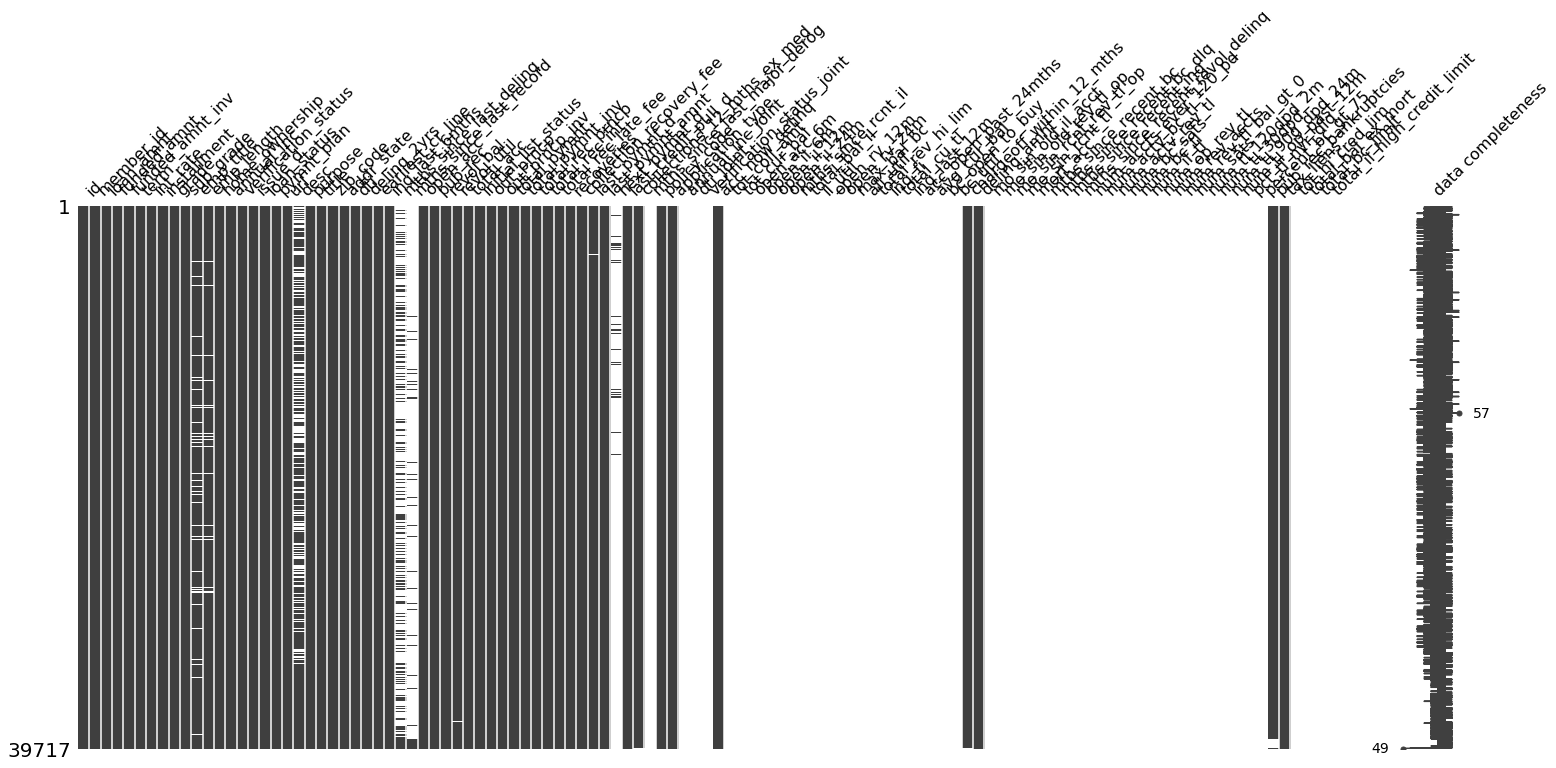

In [389]:
#ko rotate lables
# Exploring all columns wiht null values in a matrix form 
showNANMatrix(dfinit)

In [390]:
# Check for % of null values in the dataframe:
str(round((dfinit.isnull().sum().sum())/(dfinit.shape[0]*dfinit.shape[1])*100,2))+'%'

'51.34%'

### 51 % of the data is Null.

In [391]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['15% or less','85% or more']

fifteen_percent = len(dfinit.columns[((dfinit.isnull().sum())/len(dfinit)) < 0.15])
eightyfive_percent= len(dfinit.columns[((dfinit.isnull().sum())/len(dfinit)) > 0.85])
a['No.of columns'] = [fifteen_percent,eightyfive_percent]
a

Percentage of null values  No.of columns
0               15% or less             53
1               85% or more             56

## Findings
From above we can tell that 56 columns has more than 85% null values thus we will remove all of them.

<p> Note:<br>
    <b>Reviewing the data reveals that there are alot of columns which are all NAN or have only one value and unecessary columns to our analysis as well as incorrect types which will be fixed later:</b> </p>
    
    Moving on to data cleaning:

### 3.3 Fix Column Values
> Inconsistent column names (Not found in data set).<br>
> Missing Column Names (Not found in data set).<br>
> Deleting columns with Null values. (Deleted).<br>
> Unnecessary columns (or irrelative to defualter analysis) DELETED.<br>
> No Unique Identifier (Columns with only one value had been deleted).<br>
> Columns containing Multiple data values (Splitied ex: issue_d split to year and month).<br>
> Misaligned columns (Not found in dataset).<br>
> Shifted columns. <br> > No shifted columns were found. this was done by adding a column at the end of the series and then a filter applied to see if any value exists which was not

<b>Now inspect if there is any duplicate data </b>

In [392]:
# Checking for duplicate columns in the dataframe:
dfinit.duplicated().sum()

0

<b>Since there is no duplicate data there is no need to do anything here: </b>

#### Fixing NAN or null values
##### View NAN Columns using NAN Matrix

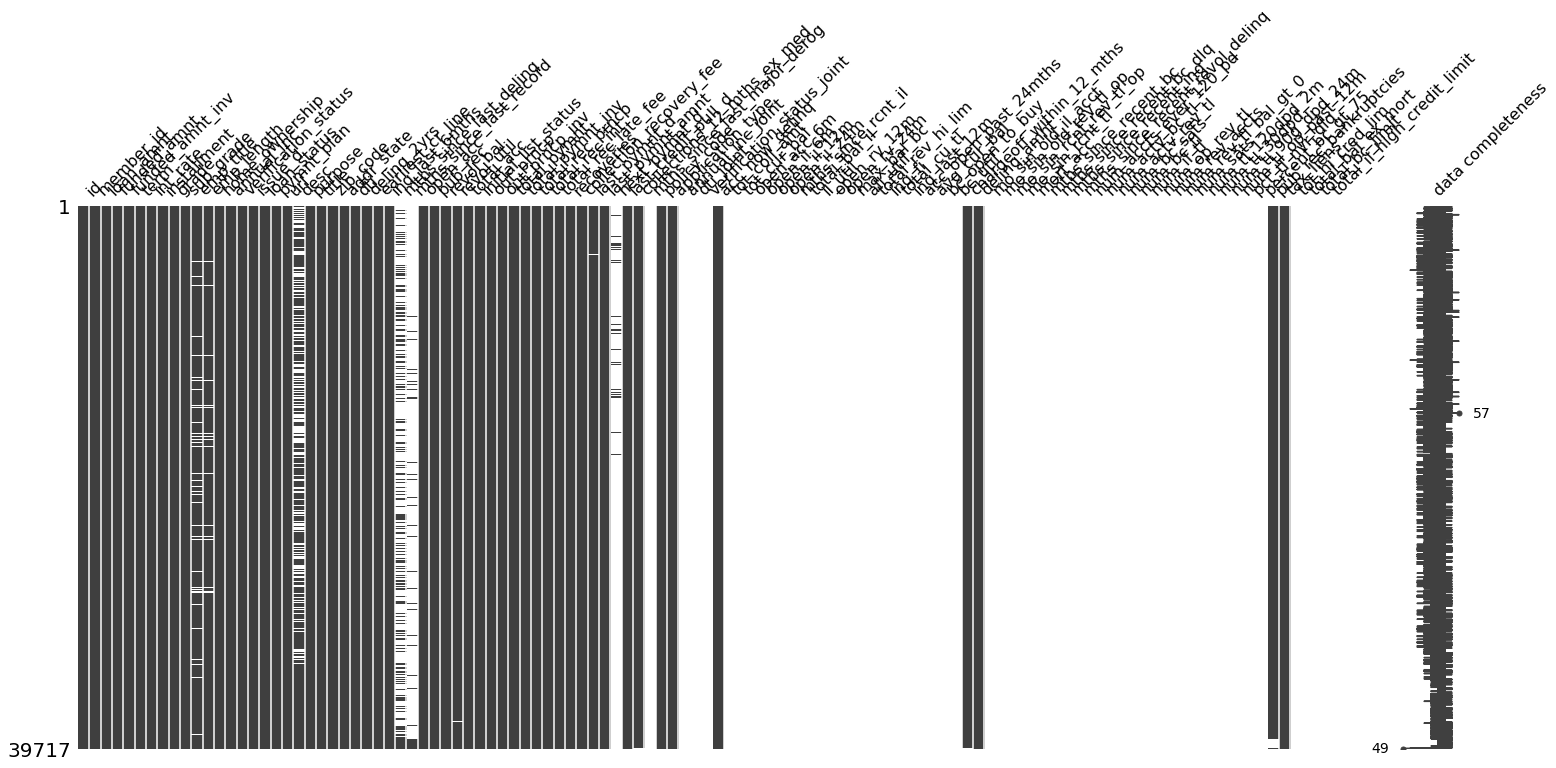

In [393]:
# Showing all columns wiht null values in a matrix form 
showNANMatrix(dfinit)

#### Note:
Here we can verify that there are large number of columns which are white meaning they don't have any data. let's remove any columns having more than 85% of null values.

##### Drop  columns with more than 85% values NAN

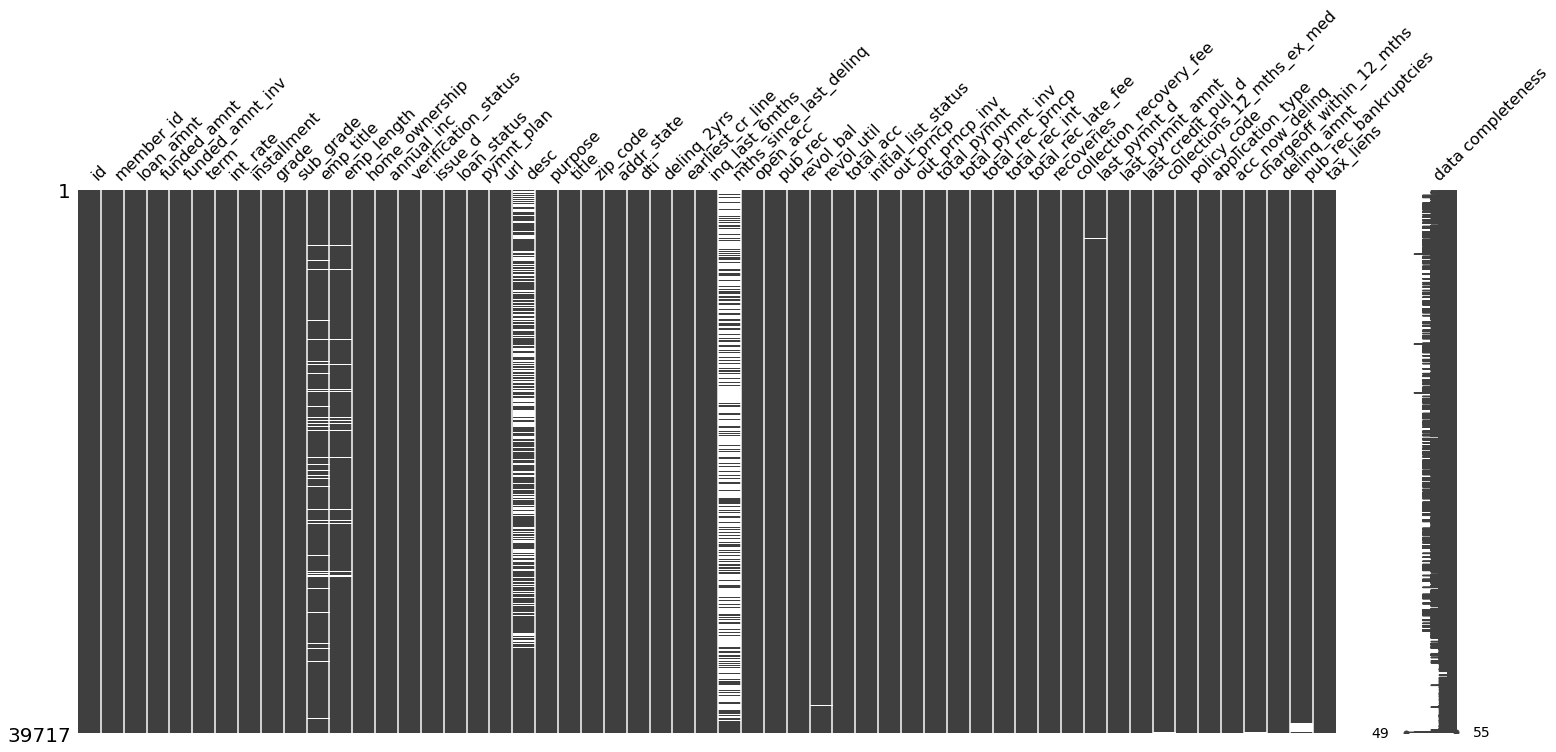

In [394]:
# Drop the columns with all null values
DropColumnsWithAllNan(dfinit)
# Drop the columns having more then 85% null values
DropColumnsWithNANGreaterthanlimit(dfinit,prcnt=85)
# View the data now
showNANMatrix(dfinit)

In [395]:
# Checking the remaining columns in the data set:
print(dfinit.columns)
# Checking columns and rows:
print(dfinit.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
(39717, 55)


#### Checking all columns with object type in the data set:

In [396]:
# Instead of checking each column of 55 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in dfinit.columns[dfinit.dtypes == 'object']:
    print(dfinit[i].value_counts())
    print('-'*30)

 36 months    29096
 60 months    10621
Name: term, dtype: int64
------------------------------
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%  

### 3.3.5 Drop columns having only one value in them. No Unique Identifier (Columns with only one value had been deleted).


#### Droping object columns which contains one value:

From above we can tell 48 columns remain:

In [397]:
# Checking all numerical columns with one value:
getColumnsWithOnlyOneValue(dfinit)

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

#### From above we can infer that all of those columns have 1 value  so lets drop them:

In [398]:
# There are also few non-useful numerical columns.We are dropping these numerical columns with one value after examining them above. 

DropColumnsWithOnlyOneValue(dfinit)
dfinit.shape

(39717, 46)

<b>Check for all of these columns dropped above and validate </b>

In [399]:

getColumnsWithOnlyOneValue(dfinit)

[]

In [400]:
cols=['emp_title','pymnt_plan','title', 'zip_code', 'addr_state', 'initial_list_status','application_type']

displayDescription(cols)

<b>emp_title</b>: The job title supplied by the Borrower when applying for the loan.*

<b>pymnt_plan</b>: Indicates if a payment plan has been put in place for the loan

<b>title</b>: The loan title provided by the borrower

<b>zip_code</b>: The first 3 numbers of the zip code provided by the borrower in the loan application.

<b>addr_state</b>: The state provided by the borrower in the loan application

<b>initial_list_status</b>: The initial listing status of the loan. Possible values are – W, F

<b>application_type</b>: Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [401]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our analysis.

DropColumnsUsinglist(dfinit,cols,'irrelavent columns')

dfinit.shape


(39717, 42)

<b> Now inspect those numeric columns where most of the values are same </b>

In [402]:
# checkpoint
getListColumnsSameNumValues(dfinit)

['delinq_2yrs',
 'pub_rec',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'pub_rec_bankruptcies']

In [403]:
# Checking 0 counts in above columns:
ls=getListColumnsSameNumValues(dfinit)
for c in ls:
    print(f'There are/is {dfinit[c].nunique()} unique value(s) in column:{c} ')
    print(f'-'*30)
    print(f'Value Counts for {c}')
    print(dfinit[c].value_counts())
    print(f'*'*30)

There are/is 11 unique value(s) in column:delinq_2yrs 
------------------------------
Value Counts for delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64
******************************
There are/is 5 unique value(s) in column:pub_rec 
------------------------------
Value Counts for pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64
******************************
There are/is 1137 unique value(s) in column:out_prncp 
------------------------------
Value Counts for out_prncp
0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1137, dtype: int64
******************************
There are/is 1138 unique value(s) in column:out_prncp_inv 
------------------------------
Value

## Findings
Here you can see that more than 75% of the values in this columns are equal to 0 are Unique. Let's remove these columns all together as they may messup our analysis. Validate that those columns are gone

In [404]:
# Dropping columns:
DropColumnsSameNumValues(dfinit)
# Validating the column is dropped:
getListColumnsSameNumValues(dfinit)

[]

<b>Analyze some of the columns such as id, member_id, url and see if they can be removed</b>

In [405]:
dfinit.shape[0]

39717

In [406]:
# Checking unique value count in above mentioned columns:
cols=["id","member_id","url"]
dfinit[cols].nunique()
# [print(dfinit[c].value_counts()) for c in cols]

id           39717
member_id    39717
url          39717
dtype: int64

## Finding
As we can see that the columns have same amount of unique values (39717) as the shape of the dataframe. This implies that all the values are unique which will not be helpful in our analysis so let's remove them</b>

In [407]:
# Deleting the columns mentioned above:

DropColumnsUsinglist(dfinit,cols,'All unique values')

<b>Analyze some of the columns such as "total_pymnt","total_pymnt_inv","total_rec_prncp" and see if they can be removed</b>

In [408]:
# Displaying the descreption of those columns:
cols=["total_pymnt","total_pymnt_inv","total_rec_prncp"]
displayDescription(cols)

<b>total_pymnt</b>: Payments received to date for total amount funded

<b>total_pymnt_inv</b>: Payments received to date for portion of total amount funded by investors

<b>total_rec_prncp</b>: Principal received to date

## Findings
Based on the description of columns total_pymnt and total_pymnt_inv, and total_rec_prncp can be removed as these are not related to our anslsysis

In [409]:
# Deleting above columns from dataframe as the do not contribute as varibles for defualters:
DropColumnsUsinglist(dfinit,cols,'non related columns')


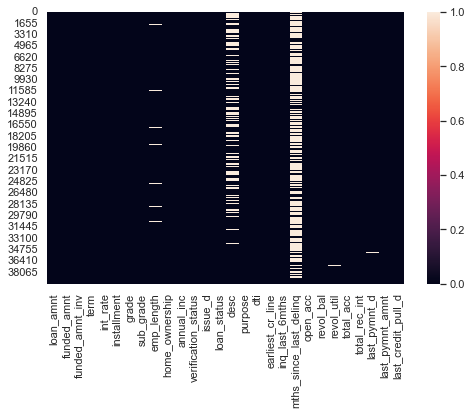

In [410]:
# ploting a heatmap with columns and null values:
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(dfinit.isnull())
plt.show()

In [411]:
#Checking mths_since_last_delinq from
displayDescription(['mths_since_last_delinq','desc'])

<b>mths_since_last_delinq</b>: The number of months since the borrower's last delinquency.

<b>desc</b>: Loan description provided by the borrower

In [412]:
# From above analysis lets drop columns(mths_since_last_delinq & desc)
# an array for columns to be dropped:
c=['mths_since_last_delinq','desc']
DropColumnsUsinglist(dfinit,c,'Columns are not related to analysis or behavioural variable')

#### Droping all columns with behaviour variables that will not affect the analysis:

In [413]:
#ccc
# total_rec_int (future variable)
# last_pymnt_amnt ()
# revol_bal (Behavioural Variable)
# inq_last_6mths (Behavioural Variable)
# total_rec_int (Behavioural Variable)
# total_acc (Behavioural Variable).
# revol_bal (Behavioural Variable).
# # open_acc (Behavioural Variable)
# last_pymnt_d (Behavioural Variable)
# last_credit_pull_d (Behavioural Variable)
# revol_util (Behavioural Variable)
# earliest_cr_line (Behavioural Variable)

# Removing all behavioural variables using our builtin function:
c=['total_rec_int','last_pymnt_d','last_credit_pull_d','revol_util','earliest_cr_line','last_pymnt_amnt','revol_bal','inq_last_6mths','total_rec_int','total_acc','revol_bal','open_acc']
DropColumnsUsinglist(dfinit,c,'Columns are not related to analysis or behavioural variable')

In [414]:

# Example as the loan_amnt increase the % of defualting increases this is the same for the two other variables ('funded_amnt'& 'funded_amnt_inv')
# Removing columns with same analysis results to defualt we took only in consedration to the loan amount approved by investor which is the actual:
c=['loan_amnt','funded_amnt']
DropColumnsUsinglist(dfinit,c,'Repitative results of analysis')

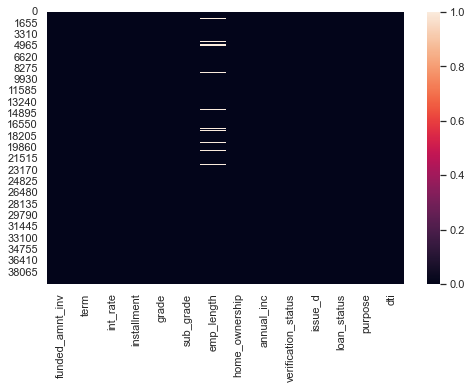

In [415]:
# ploting a heatmap with columns and null values:
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(dfinit.isnull())
plt.show()

### Outliers Identification:

<b>Let's create boxplot for all the numeric fileds and identify the outliers </b>

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.22it/s]


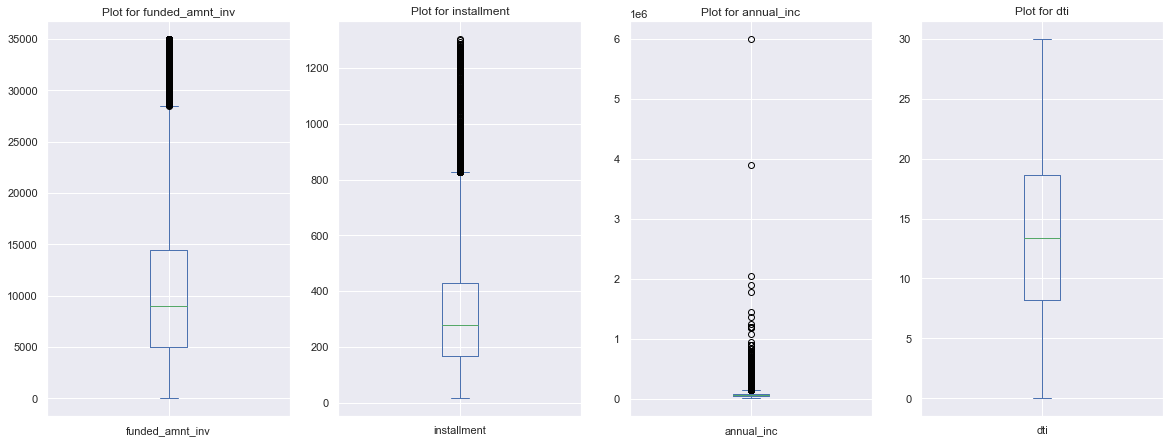

In [416]:
showBoxSubPlots(dfinit)

### 3.2 Fix Row Values ( Data Cleaning)

##### After inspecting the data in excel no issue was found in the rows so no further action required no signs of shifted rows.<br>
> Incorrect rows ,Header rows, footer rows. Not Available.<br>
> Summary rows	Total, subtotal rows NA.<br>
> Extra rows -> Outliers were deleted and all values with Current in loan_status column were deleted (has nothing to do with defualt analysis). <br>


#### Deleting Row Variables:
##### Removing all values of "current" in "loan_status" column as it a future variable we cannot identify weather it will be paid or not:

In [417]:
#show the value counts for loan status
dfinit['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [418]:
# Deleting all rows with 'Current' in loan status Column'
dfinit=dfinit[dfinit["loan_status"] != "Current" ]
# Checking all values with Current are deleted:

dfinit['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### 3.2.3  Outlier treatment

#### Inspecting Outliers % values in all numerical columns

In [419]:
# Identifying out all outliers in the dataframe and printing their % within the data:
numCols,ObjectCols=getNumObjectCols(dfinit)
for c in numCols:
    dfo,count,prcnt=getOutliers(dfinit,c)
    printmd(f'For **{c}**; there are total **{count}** outliers which is **{round(prcnt,2)}%** of the whole data')

For **funded_amnt_inv**; there are total **1034** outliers which is **2.68%** of the whole data

For **installment**; there are total **1373** outliers which is **3.56%** of the whole data

For **annual_inc**; there are total **1762** outliers which is **4.57%** of the whole data

For **dti**; there are total **0** outliers which is **0.0%** of the whole data

##### Analyze Variables and create and show KDE and Boxplots and share findings for outliers % higher than 3%
For each annual_inc column KDE, BOXplots and distribution of the data will be displayed and then outliers will be removed and same data will be displayed

###### Annual Income

>#### Before Outliers removed

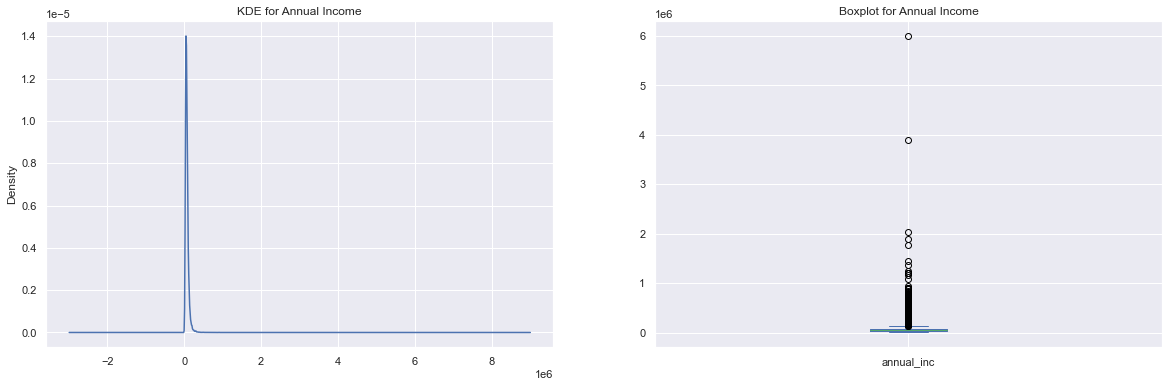


median	  58868.0
count      38577.00
mean       68777.97
std        64218.68
min         4000.00
25%        40000.00
50%        58868.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: float64


In [420]:
# Checking outliers in Annual Income Column:
colName='annual_inc'
xlabel='Annual Income'
ylabel='Values'

# We can see that the maximum value exceeds the 75% quartile hugely and is approxx. 100 times the mean thus lets remove the outliers from this column.
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> from KDE and box diagrams we can see that there are outliers and there is a lot of data outside of normal curves. Also median and mean are very different which shows there are high frequency data which will impact out analysis

>#### After Outliers removed

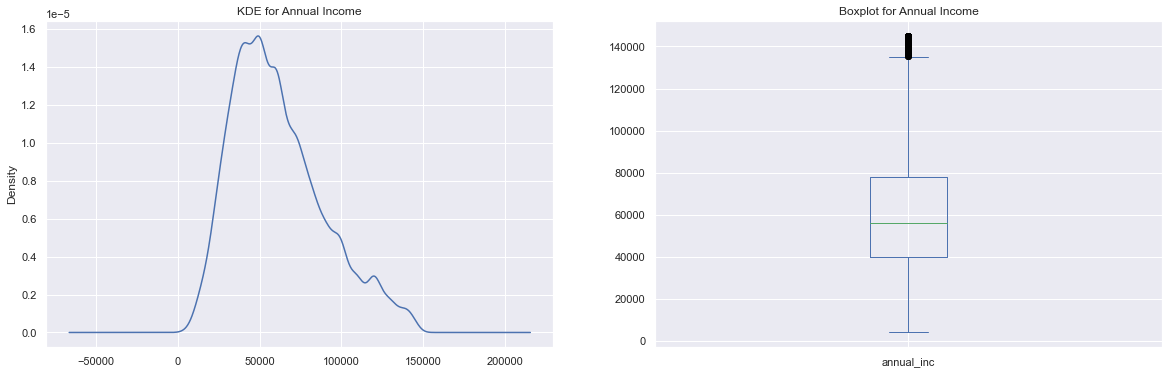


median	  56000.0
count     36815.00
mean      61218.19
std       28224.58
min        4000.00
25%       40000.00
50%       56000.00
75%       78000.00
max      145000.00
Name: annual_inc, dtype: float64


In [421]:
# Removing outliers in annual_inc column:
dfinit=RemoveOutlier(dfinit,colName)
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> After the outliers removed the data looks much better although there are still outliers which is fine for our analysis 

###### Installment

>#### Before Outliers removed

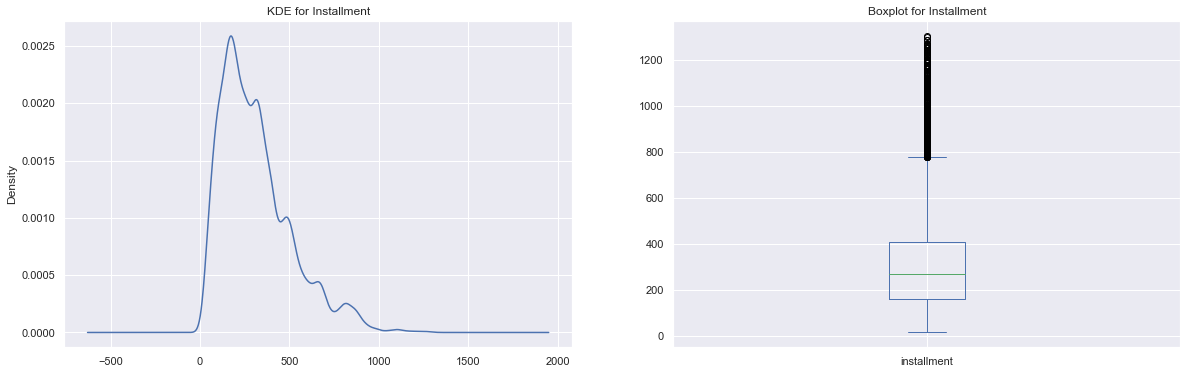


median	  271.14
count    36815.00
mean       312.59
std        199.81
min         15.69
25%        163.30
50%        271.14
75%        409.70
max       1305.19
Name: installment, dtype: float64


In [422]:
# Checking outliers in Annual Income Column:
colName='installment'
xlabel='Installment'
ylabel='Values'

# We can see that the maximum value exceeds the 75% quartile hugely.
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> from KDE and box diagrams we can see that there are outliers and there is a lot of data outside of normal curves. Also median and mean are very different which shows there are high frequency data which will impact out analysis

>#### After Outliers removed

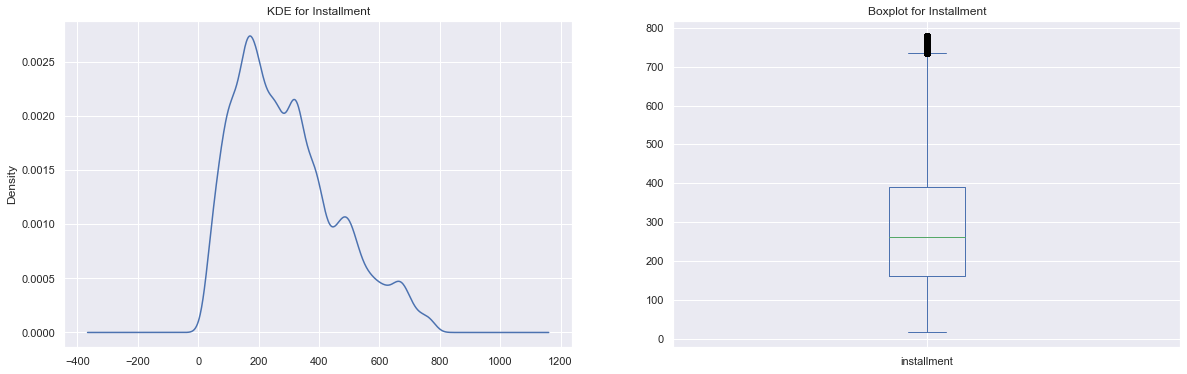


median	  261.63
count    35437.00
mean       290.32
std        166.76
min         15.69
25%        160.78
50%        261.63
75%        390.72
max        779.13
Name: installment, dtype: float64


In [423]:
# Removing outliers in installment column:
dfinit=RemoveOutlier(dfinit,colName)
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> After the outliers removed the data looks much better although there are still outliers which is fine for our analysis 

###### Fundend amount by Investors:

>#### Before Outliers removed

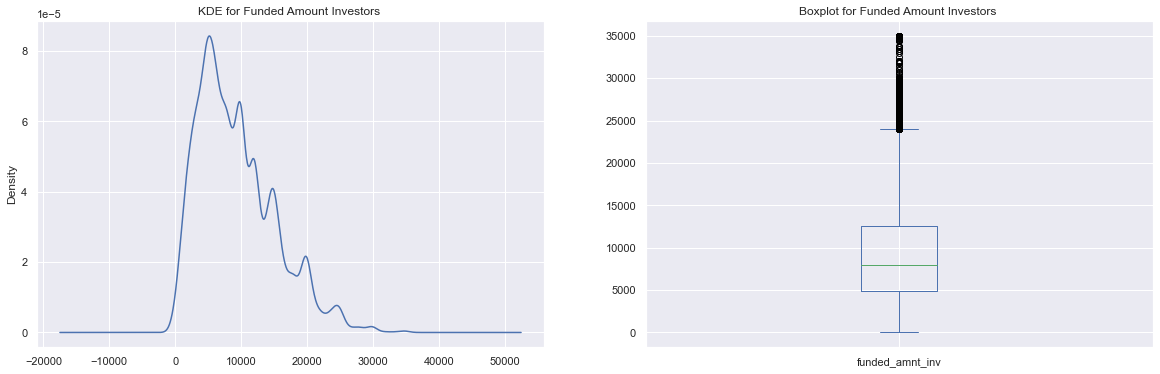


median	  8000.0
count    35437.00
mean      9278.36
std       5874.87
min          0.00
25%       4926.57
50%       8000.00
75%      12551.25
max      35000.00
Name: funded_amnt_inv, dtype: float64


In [424]:
# Checking outliers in Annual Income Column:
colName='funded_amnt_inv'
xlabel='Funded Amount Investors '
ylabel='Values'

# We can see that the maximum value exceeds the 75% quartile hugely:
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> from KDE and box diagrams we can see that there are outliers and there is a lot of data outside of normal curves. Also median and mean are very different which shows there are high frequency data which will impact out analysis

>#### After Outliers removed

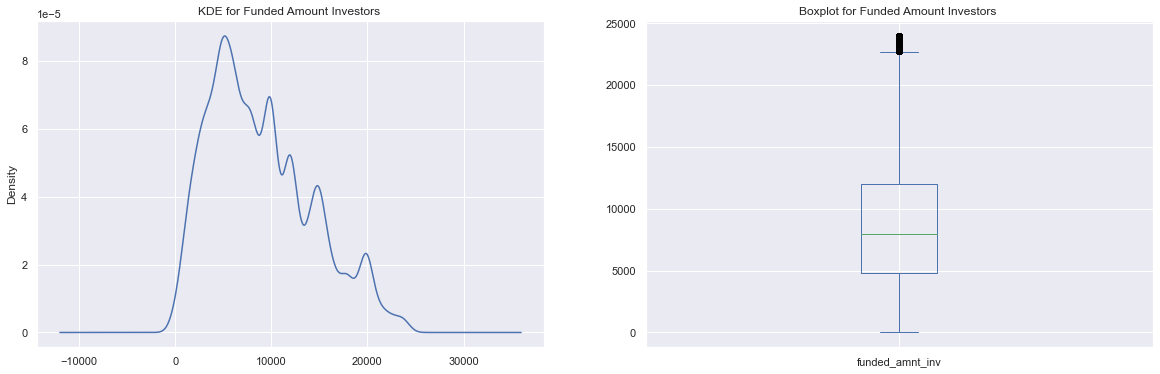


median	  8000.0
count    34672.00
mean      8896.86
std       5327.20
min          0.00
25%       4846.21
50%       8000.00
75%      12000.00
max      23987.42
Name: funded_amnt_inv, dtype: float64


In [425]:
# Removing outliers in funded_amnt_inv column:
dfinit=RemoveOutlier(dfinit,colName)
UnivariantAnalysis(dfinit,colName,xlabel,ylabel)

> After the outliers removed the data looks much better although there are still outliers which is fine for our analysis 

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 64.71it/s]


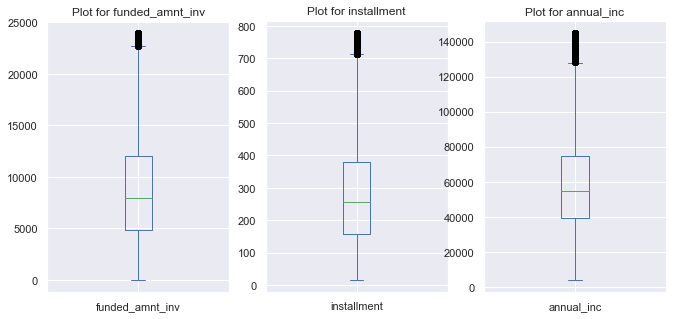

In [426]:
# After analyzing the data above those 3 columns have outliers:
# Checking outliers in 3 important Numerical columns ('installment','annual_inc', 'funded_amnt_inv'):
cols=['funded_amnt_inv','installment','annual_inc']
showBoxSubPlotsUsingList(dfinit,cols,figs=(15,5))


#### IQR for numerical columns


In [427]:
# Check for IQR for all numerical columns after removing outliers in columns with outliers:
dfinit.describe().round(2)

funded_amnt_inv  installment  annual_inc       dti
count         34672.00     34672.00    34672.00  34672.00
mean           8896.86       282.26    59441.77     13.39
std            5327.20       159.08    27405.70      6.67
min               0.00        15.69     4000.00      0.00
25%            4846.21       158.77    39600.00      8.25
50%            8000.00       257.16    55000.00     13.50
75%           12000.00       380.45    75000.00     18.68
max           23987.42       778.72   145000.00     29.99

### 3.4 Analyze and impute empty values (Missing Values)
>Disguised Missing values (Set values as mising values)<br>
>Significant number of Missing values in a row/column (will be deleted)<br>
>Partial missing values (fill missing values with correct value)<br>

In [428]:
# After deleting columns with 85% null values we will analyze remaining null values in columns:
# Displaying % of null values in columns remaining:
cnts=getObjectsWihtAnyMissingValue(dfinit,prcnt=100)
cnts

ColName  percn
6  emp_length   2.83

<b>As you can see there is only one column left with missing values. Let's analyze them one at a time and decide what to do with them</b>


In [429]:
c='emp_length'
# Getting unique value counts in emp_title column:
dfinit[c].value_counts()
# analyzing the emp_length column:
print(dfinit['emp_length'].value_counts())
# There are 990 null item:
print(dfinit['emp_length'].isnull().value_counts())


10+ years    7170
< 1 year     4193
2 years      3959
3 years      3668
4 years      3041
1 year       2926
5 years      2893
6 years      1951
7 years      1547
8 years      1257
9 years      1085
Name: emp_length, dtype: int64
False    33690
True       982
Name: emp_length, dtype: int64


In [430]:
# Replacing missing values in emp_length to mode value after analyzing the column:
SetMissingToMaxValue(dfinit,'emp_length')
# Validating no missing values in column emp_length:
print(dfinit['emp_length'].isnull().value_counts())

False    34672
Name: emp_length, dtype: int64


<b>Let's validate that no columns has any missing values</b>

In [431]:
# Validating all columns have no missing values after replacing,fixing and imputing missing values:
cnts=getObjectsWihtAnyMissingValue(dfinit,prcnt=100).reset_index(drop=True)
cnts

Empty DataFrame
Columns: [ColName, percn]
Index: []

## Print the log of deleted columns along with reason

In [432]:
# Printing the log of columns Deleted and the reason.
getLogDF()[['Log','Reason']].query('Reason !=""')

Log  \
2      Deleting column mths_since_last_major_derog   
3                 Deleting column annual_inc_joint   
4                        Deleting column dti_joint   
5        Deleting column verification_status_joint   
6                     Deleting column tot_coll_amt   
7                      Deleting column tot_cur_bal   
8                      Deleting column open_acc_6m   
9                       Deleting column open_il_6m   
10                     Deleting column open_il_12m   
11                     Deleting column open_il_24m   
12              Deleting column mths_since_rcnt_il   
13                    Deleting column total_bal_il   
14                         Deleting column il_util   
15                     Deleting column open_rv_12m   
16                     Deleting column open_rv_24m   
17                      Deleting column max_bal_bc   
18                        Deleting column all_util   
19                Deleting column total_rev_hi_lim   
20                          Deleting column inq_fi   
21                     Deleting column total_cu_tl   
22                    Deleting column inq_last_12m   
23            Deleting column acc_open_past_24mths   
24                     Deleting column avg_cur_bal   
25                  Deleting column bc_open_to_buy   
26                         Deleting column bc_util   
27              Deleting column mo_sin_old_il_acct   
28            Deleting column mo_sin_old_rev_tl_op   
29           Deleting column mo_sin_rcnt_rev_tl_op   
30                  Deleting column mo_sin_rcnt_tl   
31                        Deleting column mort_acc   
32            Deleting column mths_since_recent_bc   
33        Deleting column mths_since_recent_bc_dlq   
34           Deleting column mths_since_recent_inq   
35  Deleting column mths_since_recent_revol_delinq   
36           Deleting column num_accts_ever_120_pd   
37                  Deleting column num_actv_bc_tl   
38                 Deleting column num_actv_rev_tl   
39                     Deleting column num_bc_sats   
40                       Deleting column num_bc_tl   
41                       Deleting column num_il_tl   
42                   Deleting column num_op_rev_tl   
43                   Deleting column num_rev_accts   
44             Deleting column num_rev_tl_bal_gt_0   
45                        Deleting column num_sats   
46                Deleting column num_tl_120dpd_2m   
47                    Deleting column num_tl_30dpd   
48              Deleting column num_tl_90g_dpd_24m   
49              Deleting column num_tl_op_past_12m   
50                  Deleting column pct_tl_nvr_dlq   
51                Deleting column percent_bc_gt_75   
52                 Deleting column tot_hi_cred_lim   
53               Deleting column total_bal_ex_mort   
54                  Deleting column total_bc_limit   
55      Deleting column total_il_high_credit_limit   
56          Deleting column mths_since_last_record   
57                    Deleting column next_pymnt_d   
58                      Deleting column pymnt_plan   
59             Deleting column initial_list_status   
60      Deleting column collections_12_mths_ex_med   
61                     Deleting column policy_code   
62                Deleting column application_type   
63                  Deleting column acc_now_delinq   
64        Deleting column chargeoff_within_12_mths   
65                     Deleting column delinq_amnt   
66                       Deleting column tax_liens   
67                       Deleting column emp_title   
68                           Deleting column title   
69                        Deleting column zip_code   
70                      Deleting column addr_state   
71                     Deleting column delinq_2yrs   
72                         Deleting column pub_rec   
73                       Deleting column out_prncp   
74                   Deleting column out_prncp_inv   
75              Deleting column total_rec_late_fee 

### 3.5 Fix Invalid Values
>Incorrect data types (Fixed column by column) <br>
>Wrong structure (Not found in dataset) <br>
>Correct values beyond range ( found in dataset and delted)<br>
>Validate internal rules(Validated) <br>
>Encoding Issues (Not found in dataset) <br>

In [433]:
# Fixing Emp_length column for better visualization: Considering <1 t 0 years and >10 to 10 years of experience:
dfinit["emp_length"] = pd.to_numeric(dfinit["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))



In [434]:
# Fixing invalid values in funded_amnt_inv column and standarizing its percision:
dfinit[dfinit['funded_amnt_inv']<100].head()
#only keep the values which are greater than 100 other data looks wrong such as
# 0.004354 for row 38395
dfinit=dfinit[dfinit['funded_amnt_inv']>100]
#we also need to roudn it to 2
dfinit['funded_amnt_inv']=dfinit['funded_amnt_inv'].round(2)
#inspect the data again
dfinit['funded_amnt_inv'].head()

0     4975.0
1     2500.0
2     2400.0
3    10000.0
5     5000.0
Name: funded_amnt_inv, dtype: float64

#### Standardise precision 

In [435]:
#Checking percision for all numerical columns: 2 decimal places:
dfinit.describe()

funded_amnt_inv   installment    emp_length     annual_inc  \
count     34515.000000  34515.000000  34515.000000   34515.000000   
mean       8937.312759    282.713792      4.976793   59473.069266   
std        5305.346805    159.195703      3.583976   27420.891466   
min         106.530000     15.690000      0.000000    4000.000000   
25%        4900.000000    158.860000      2.000000   39600.000000   
50%        8000.000000    257.980000      4.000000   55000.000000   
75%       12000.000000    381.040000      9.000000   75000.000000   
max       23987.420000    778.720000     10.000000  145000.000000   

                dti  
count  34515.000000  
mean      13.395390  
std        6.671564  
min        0.000000  
25%        8.265000  
50%       13.500000  
75%       18.680000  
max       29.990000

> Since there are no high number of perceisions we don't need to do anything here

<b>Now Analyze the matrix one more time this time there should be no empty values</b>

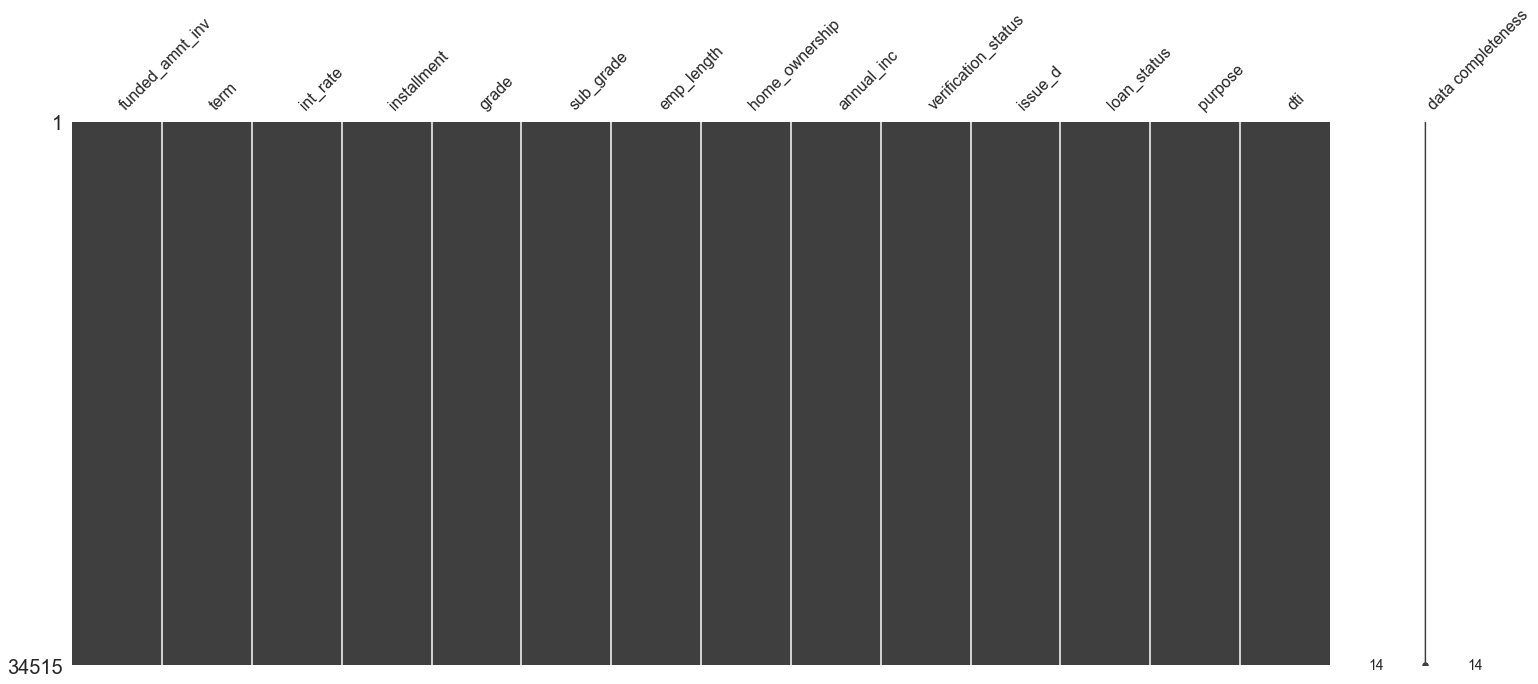

In [436]:
# Checking all cloumns for Null values again to ensure non exist:
showNANMatrix(dfinit)

## Fixing Incorrect Data Types:



##### Columns with % in the value
if we look at "revol_util","int_rate" we will find that they have % embeded we can remove the %  and create new columns and analysis  can be performed on these newly created columns


In [437]:
# Analyzing the values in columns ("int_rate")
col="int_rate"
dfinit[col].reset_index(drop=True).head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4     7.90%
Name: int_rate, dtype: object

In [438]:
# Removing the % sign and replacing the object to float in column ("int_rate")
dfinit[col]=dfinit[col].str.replace('%','').astype('float')

In [439]:
# Displaying the column after fixing data type:
dfinit[col].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

## Fixing Incorrect Data Types:

In [440]:
# Displaying the column descreption for the list below from the dictionary:
cols=['issue_d']
displayDescription(cols)

<b>issue_d</b>: The month which the loan was funded

In [441]:
print(dfinit[cols].head())
print(dfinit[cols].dtypes)

  issue_d
0  Dec-11
1  Dec-11
2  Dec-11
3  Dec-11
5  Dec-11
issue_d    object
dtype: object


#### From above we can impute that issue_d column type is incorrect and we can derive the year and month from the column:

### Derived Metrics
>#### Type Driven

##### Date columns

In [442]:
# Deriving new columns out of issue_d column for issue_d_Month and issue_d_Year:
d='issue_d'
m=f'{d}_Month'
y=f'{d}_Year'
# Converting object column issue_d to datetime format
dfinit[d] = pd.to_datetime(dfinit[d], format='%b-%y')
dfinit[m] = dfinit[d].dt.month
dfinit[y] = dfinit[d].dt.year
# Displaying the output:
dfinit[[d,m,y]].head()

issue_d  issue_d_Month  issue_d_Year
0 2011-12-01             12          2011
1 2011-12-01             12          2011
2 2011-12-01             12          2011
3 2011-12-01             12          2011
5 2011-12-01             12          2011

In [443]:
# Checking the types of new columns generated above and issue_d column:
dfinit[[d,m,y]].dtypes

issue_d          datetime64[ns]
issue_d_Month             int64
issue_d_Year              int64
dtype: object

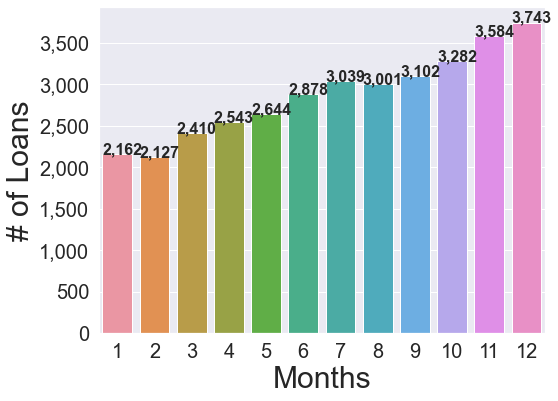

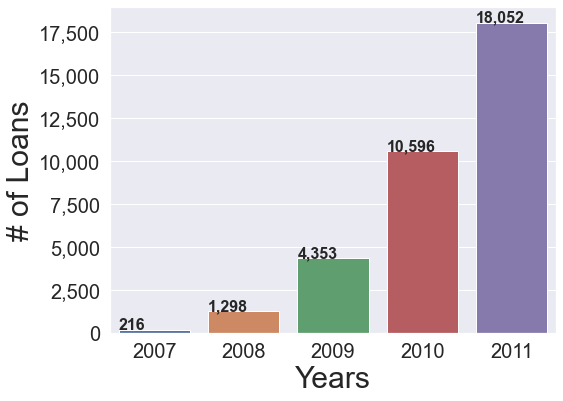

In [444]:

dateparts=[('Months',m),('Years',y)]
for datepart in dateparts:
    ShowCountPlot(dfinit,datepart[1],datepart[0])


>  We can see highest number of loans where originated in the month of December. We will use this column in subsequent Analysis<br>
> We can analyze that the number of loans issued is increasing significantly each year.

### Create new variable  Status
### Derived Metrics
>#### Business Driven Data


In [445]:
# After deleting the current from loan_status column we are left with 2 variables:
dfinit['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

> loan_status has 2 values now 1-fully paid, 2-charged off as shown above.

In [446]:
#View the data
dfinit.loan_status.value_counts().reset_index()

index  loan_status
0   Fully Paid        29563
1  Charged Off         4952

In [447]:
#create new variables
# Good represents fully paid loans and bad represents defualters: 
gd='Good'
bd='Bad'
# The new column is being created to add more logic to the loan_status column for ex: making current loan status as undefined:
dfinit["Status"]=dfinit.loan_status.apply(lambda x: bd if x=='Charged Off' else gd)

# Create a new column Target  with numeric values as Fully Paid to 0 and Charged Off to 1
dfinit["Target"] = dfinit["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

# Create two additional variables one for good loand and second for bad loan
# this will make calculation easier instead of writing if else statements
dfinit["AmntGL"]=dfinit.apply(lambda x: x.funded_amnt_inv if x.Status==gd else 0,axis=1)
dfinit["AmntBL"]=dfinit.apply(lambda x: x.funded_amnt_inv if x.Status==bd else 0,axis=1)

#crete a new column ''% of Bad Loans'
c="% of Bad Loans"
dfinit[c]=round((dfinit.AmntBL/(dfinit.AmntGL+dfinit.AmntBL))*100,2)


In [448]:
#View the data
dfinit.Status.value_counts().reset_index()

index  Status
0  Good   29563
1   Bad    4952

### Derived Metrics - ( Data/Business/Type):
#### Creating Bins:

In [449]:
#Checking the IQR,maximum, and min values to be able to create bins that would describe the columns meaningfully:
cols=['funded_amnt_inv','annual_inc','int_rate','installment','dti']
dfinit[cols].describe().round(2)

funded_amnt_inv  annual_inc  int_rate  installment       dti
count         34515.00    34515.00  34515.00     34515.00  34515.00
mean           8937.31    59473.07     11.71       282.71     13.40
std            5305.35    27420.89      3.59       159.20      6.67
min             106.53     4000.00      5.42        15.69      0.00
25%            4900.00    39600.00      8.88       158.86      8.26
50%            8000.00    55000.00     11.49       257.98     13.50
75%           12000.00    75000.00     14.17       381.04     18.68
max           23987.42   145000.00     24.40       778.72     29.99

In [450]:
# After checking the ranges above we will create bins to all columns mentioned above and Derive new columns for better analysis:

# Bining funded_amnt_inv 
# setting up bins to match the range of funded_amnt_inv column:
bins = [-np.inf, 5000, 10000, 12000, 15000, np.inf]
# setting labels to different bins set above:
bin_labels = ['0-5000', '5000-10000', '10000-12000', '12000-15000','23000 +']
# Deriving a new column funded_amnt_inv_range relative to the bins created:
dfinit['funded_amnt_inv_range'] = pd.cut(dfinit['funded_amnt_inv'], bins, labels=bin_labels)

# Bining annual_inc
# setting up bins to match the range of annual_inc column:
bins = [0, 25000, 50000, 75000, 100000, 120000, 145000]
# setting labels to different bins set above:
bin_labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-120000','1450000+']
# Deriving a new column annual_inc_range relative to the bins created:
dfinit['annual_inc_range'] = pd.cut(dfinit['annual_inc'], bins, labels=bin_labels)

# Bining int_rate
# setting up bins to match the range of int_rate column:
bins = [0, 7.5, 10, 12.5, 15, 25]
# setting labels to different bins set above:
bin_labels = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '>25']
# Deriving a new column annual_inc_range relative to the bins created:
dfinit['int_rate_range'] = pd.cut(dfinit['int_rate'], bins, labels=bin_labels)

#  Bining installment
# defining a function to set different categories (bins) reltive to the installment amount:
def installment_category(n):
    if n<=100:
        return 'Low (<100)'
    elif n>100 and n<=280:
        return "Medium (100-280)"
    elif n>280 and n<=500:
        return "High (280-500)"
    else:
        return "Very High (>500)"
# Applying the function on installment column to derive a new column with specified categories:
dfinit['installment'] = dfinit['installment'].apply(lambda x: installment_category(x))    

# Bining dti 
# setting up bins to match the range of dti column:
bins = [-np.inf, 5, 10, 15, 20, 25, np.inf]
# setting labels to different bins set above:
bin_labels = ['0 to 5', '5 to 10', '10 to 15', '15 to 20','20 to 25','> than 25+ ']
# Deriving a new column dti_range relative to the bins created:
dfinit['dti_range'] = pd.cut(dfinit['dti'], bins, labels=bin_labels)

# 5.0 Data_Analysis

## 5.1 Univariate_and_segmented_univariate_analysis

> Objectives:   
Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analysis successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

### Columns to be analyzed:
>*['funded_amnt_inv_range', 'term', 'int_rate_range', 'installment', 'grade','sub_grade', 
 'emp_length', 'home_ownership', 'annual_inc_range ,'verification_status', 'purpose', 'dti','issue_d_Month', 'issue_d_Year', 'Status']

## Functions that will be used for analysis:



In [451]:
# Plotting Functions:

# Function to plot pie cahrts.
def PlotPie(df,colName,titl,fsize=(500,300)) :
    '''
    purpose: this function creates the pie
    df: dataframe
    colName: the name of the column whose pie needs to be created
    titl: Title of the chart
    fsize: tuble of width and height with default value of 500 an 300
    '''
    import plotly.graph_objs as go#visualization
    import plotly.tools as tls#visualization
    import plotly.figure_factory as ff#visualization
    import plotly.offline as py#visualization
    #create a trace  
    trace = go.Pie(values  = df[colName].value_counts().values.tolist(),
                    labels  = df[colName].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+value",
                    domain  = dict(x = [0,.48]),
                    name    = colName,
                    marker  = dict(line = dict(width = 2,
                                color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    #define layout
    layout = go.Layout(dict(title =  f" Distribution of {titl}",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)"
                            ),
                       height=fsize[1],
                       width=fsize[0]
                      )
    data = [trace]
    fig  = go.Figure(data = data,layout = layout)
    #plot
    py.iplot(fig)
    


#this variable is being used many places below to avoid typos string literal is not being used



# A function to plot scatter plots for bivariate analysis:
def plotscatter_bivariate(x, y):
    '''
    This function dras the scatter plot
    x: the name of the column on x-axis
    y: the name of the column on y-axis
    return value: none
    '''
    #set the figure size
    plt.figure(figsize=(20,10))
    #sort x and plot
    sns.scatterplot(x=sorted(dfinit[x]), y=y, hue="loan_status", data=dfinit, color='green')
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    

def plotBarUnivariate_defualter_ratio(variable, data=dfinit, figsize=(15,5), rsorted=False,fsize=12):
    '''
    A function to plot single variable against % of defualted loans from Status column rsorted False.
    
    variable: the name of the variable
    data: datafame
    figsize: figure size
    rsorted: if sort required
    return value: none
    '''
    plt.figure(figsize=figsize)
    if rsorted:
        variable_size = sorted(data[variable].unique())
    else:
        variable_size = data[variable].unique()
    variable_values = []
    for n in variable_size:
        variable_filter = data[data[variable]==n]
        variable_count = len(variable_filter[variable_filter["Status"]=='Bad'])
        variable_values.append(variable_count*100/variable_filter["Status"].count())
    ax=sns.barplot(x=variable_size,y=variable_values)
    for p in ax.patches:
        ax.annotate('{:.2%}'.format(p.get_height()/100), \
                    (p.get_x(), p.get_height()), weight='bold',fontsize=fsize)
    plt.title("Loan Defaults % vs. "+str(variable)+" variable - countplot")
    plt.xlabel(variable, fontsize=16)
    plt.ylabel("% of Defualted Loan", fontsize=16)
    plt.show()
    
#

def plotBarUnivariate_defualter_ratio_rsorted(variable, data=dfinit, figsize=(15,5), rsorted=True,fsize=12):
    '''
    A function to plot single variable against % of defualted loans from Status column rsorted True.
    
    variable: the name of the variable
    data: datafame
    figsize: figure size
    rsorted: if sort required
    return value: none
    '''
    
    plt.figure(figsize=figsize)
    if rsorted:
        variable_size = sorted(data[variable].unique())
    else:
        variable_size = data[variable].unique()
    variable_values = []
    for n in variable_size:
        variable_filter = data[data[variable]==n]
        variable_count = len(variable_filter[variable_filter["Status"]=='Bad'])
        variable_values.append(variable_count*100/variable_filter["Status"].count())
    ax=sns.barplot(x=variable_size,y=variable_values)
    for p in ax.patches:
        ax.annotate('{:.2%}'.format(p.get_height()/100), \
                    (p.get_x(), p.get_height()), weight='bold',fontsize=fsize)
    plt.title("Loan Defaults % vs. "+str(variable)+" variable - countplot")
    plt.xlabel(variable, fontsize=16)
    plt.ylabel("% of Defualted Loan", fontsize=16)
    plt.show()


### Lets Fisrt Analyze the % of Defualt Loans across the whole dataset:

## Loan Status

In [452]:
# Calling the function to pie plot the loan_status column:
PlotPie(dfinit,'Status','Loan Status',fsize=(600,350))

## Findings 
>We can see that the total default loans from 2007 to 2011 are 4,999 Loans which represents 14.4% of the whole dataset: We will try to identify the variables that lead to a loan defualt to reduce the % of defualts in future:

## Home_Ownership

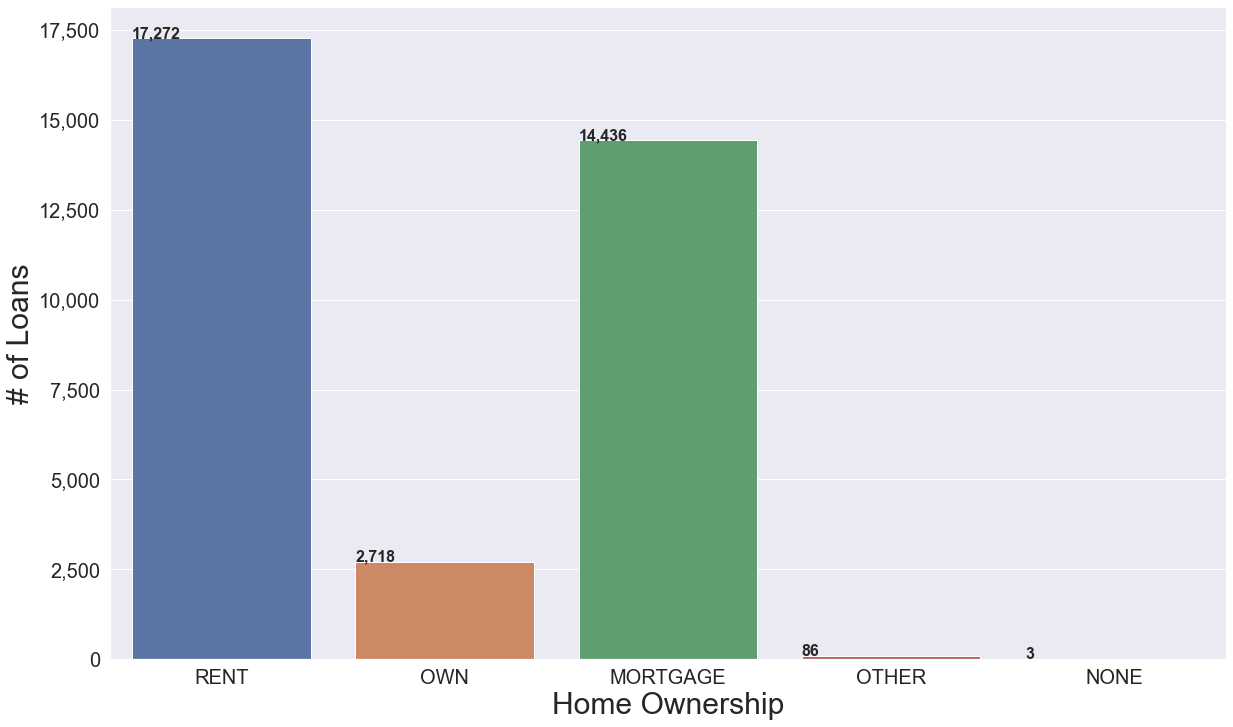

In [453]:
c='home_ownership'
t='Home Ownership'
ShowPieAndCountPlot(dfinit,c,t)

### Findings:
> We can infer from above that 50% of loan borrowers are renting 41.8% have mortaged their houses and only 7.87% who apply for loans own a house:  
> We can conclude that people who own most probably have good cash flow thus 91.8 % of loan borrowers are those who rent houses or mortaged their houses:


### Home ownership vs. % of loan defualts:

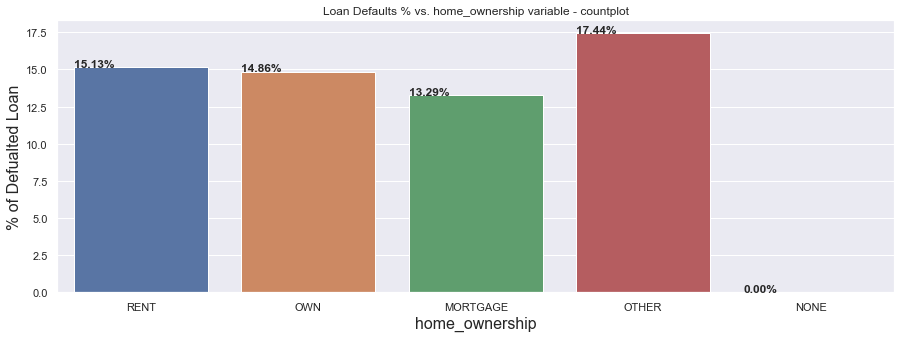

In [454]:
plotBarUnivariate_defualter_ratio('home_ownership')

### Findings:
>* We can infer from above that home ownership is almost the same for different categories and the % of loan to default for people who rent houses is slightly greater than those who own a house.  
>*Others show the highest % of loan to default but we cannot infer anything as others represents less than 0.25% of the dataset. 
>* Lending money to people with rented houses reflects higher risk of a loan to default:  
>* This is a weak variable:  
>* We will not consider this for further analysis : NO 

## Issue_d_Month

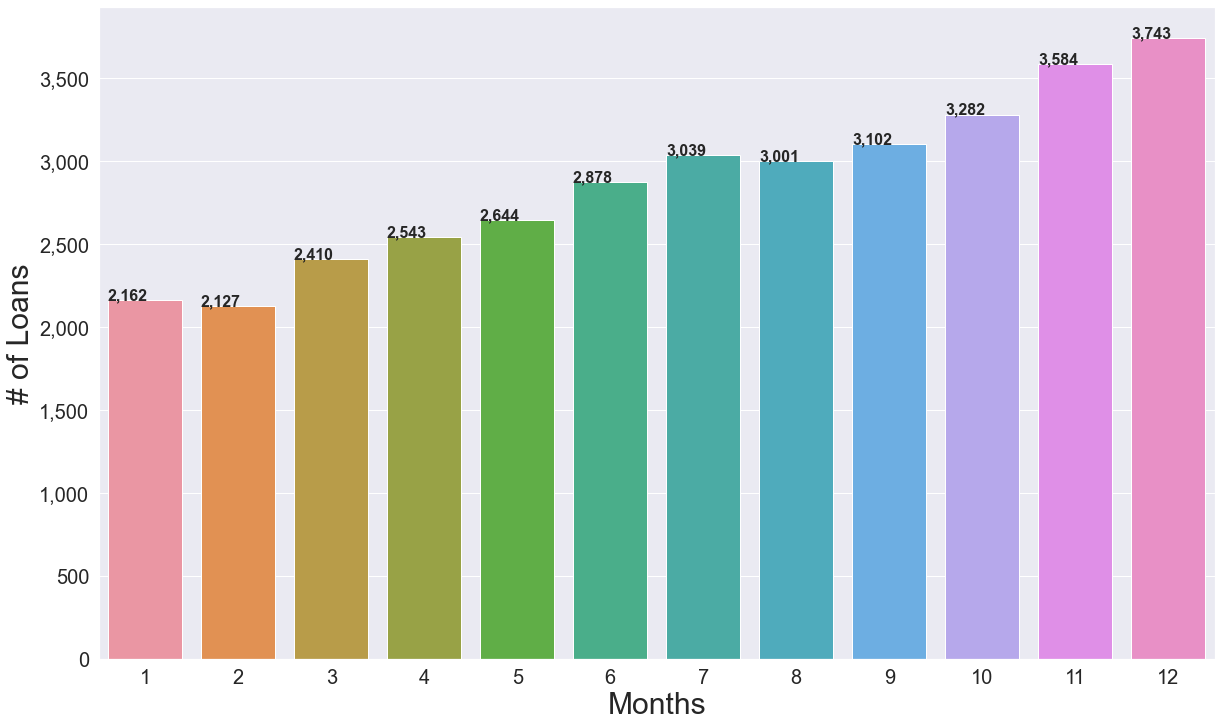

In [455]:
# Plot a pie chart and a count plot for Months vs: the count of loans:
m=f'issue_d_Month'
ShowPieAndCountPlot(dfinit,m,'Months')

### Findings:

> We can infer from above that the loans issued across the year are almost the same in terms of count.  
> The highest # of loans issued was in December (10.8%) and the lowest was in February(6.16%) around 4% differnence: 

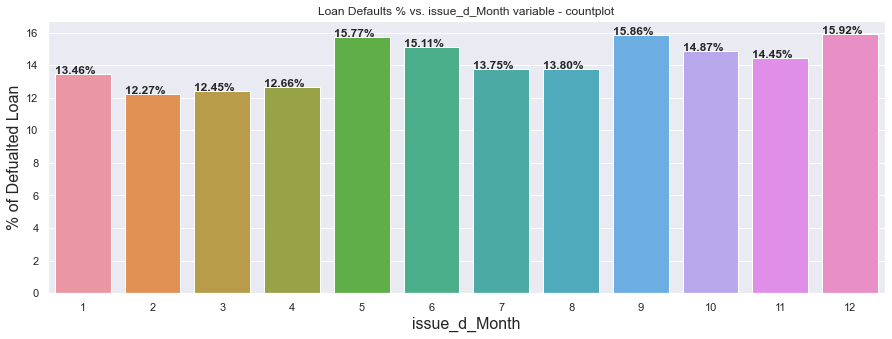

In [456]:
plotBarUnivariate_defualter_ratio('issue_d_Month')

### Findings:
>* We can infer from above that the percentage of defualted loans against ecach month is almost the same with the lowst value of 12.27% in February and the highest at May,Sept and Dec 15.92%. 3% range.  
>* Based on the data above we can infer that approving loans during different months will not significantly affect % of a loan to defualt.
>*This is a weak variable:  
>>* We will not consider this for further analysis : NO

## Issue_d_year

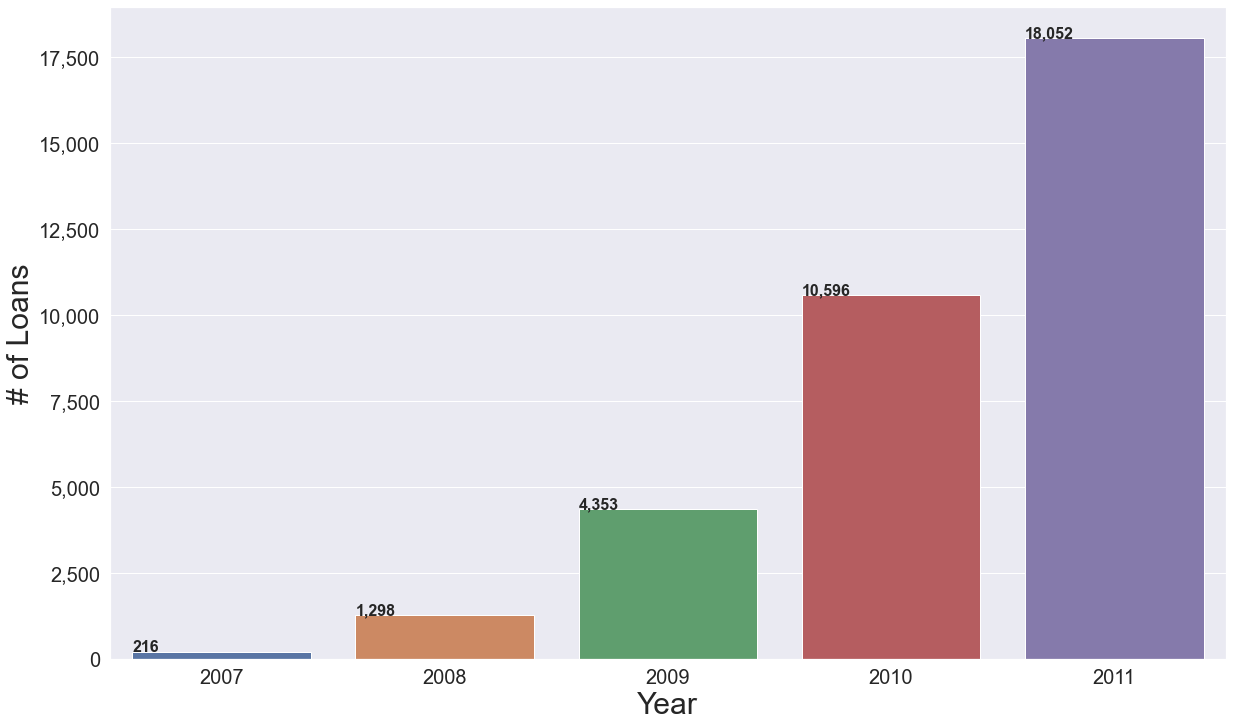

In [457]:
# Plot a pie chart and a count plot for Months vs: the count of loans:
m=f'issue_d_Year'
ShowPieAndCountPlot(dfinit,m,'Year')

### Findings:
>* Less than 1% of the total loans was issued in 2007
>* More than 50% of the loans were issued in 2011.
>* 80% of the loans are issued in in years 2010 & 2011

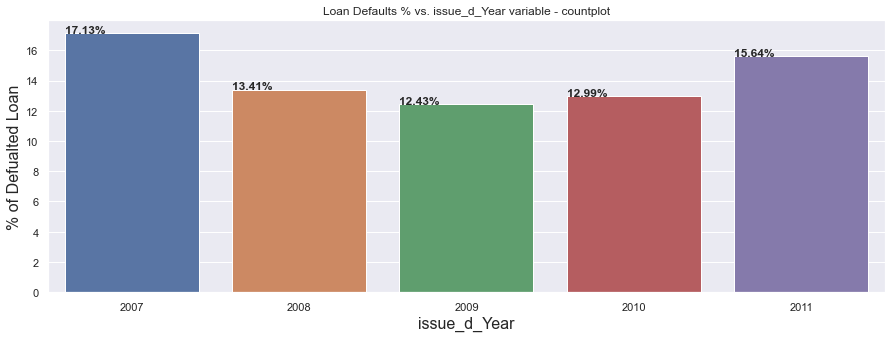

In [458]:
plotBarUnivariate_defualter_ratio('issue_d_Year')

### Findings:
>* We can infer from above that in 2007 % of defaulted loan was the highest but its not a strong base as all loans issued in 2007 represents less than 1% the dataset.
>* Majority of loans were issued in years 2010 & 2011  and the % of loan default is within range relative to the count.
>* This is a weak variable:
>>* We will not consider this for further analysis : NO

## Grade:

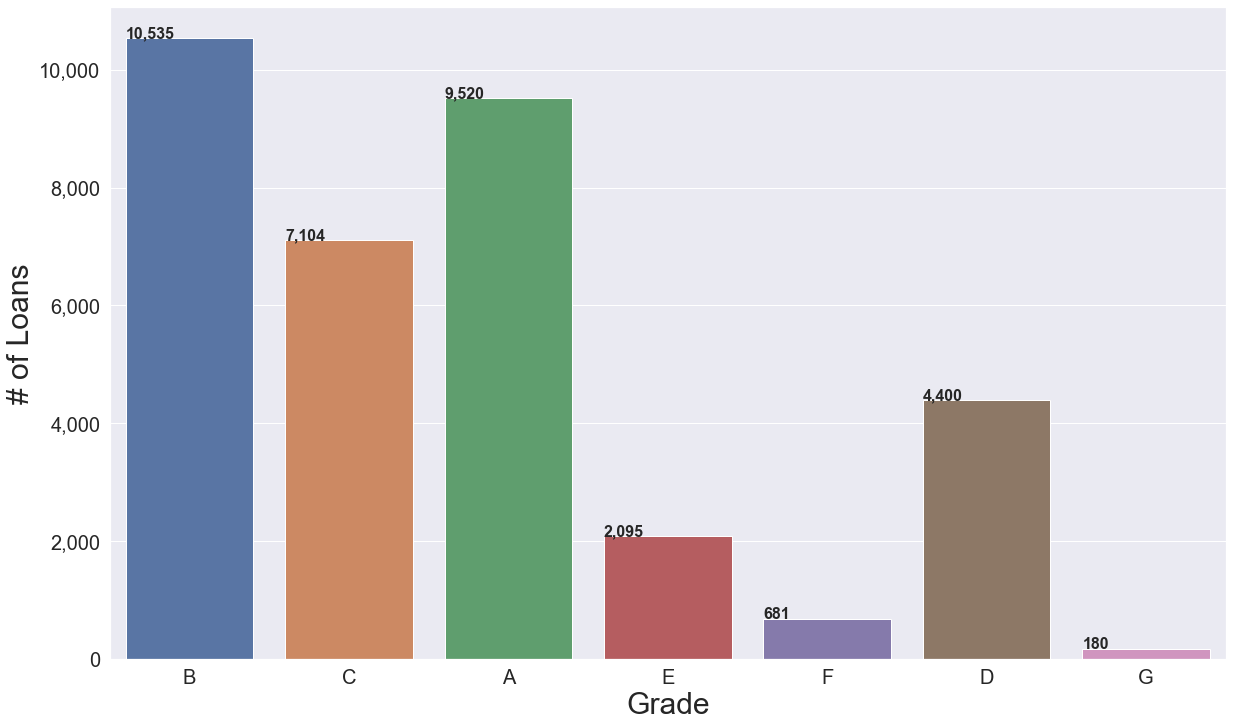

In [459]:
# Plotting grade distribution across the data:
ShowPieAndCountPlot(dfinit,'grade','Grade')

### Findings:
> From above  plots we can infer that grade B represents 30.5% of the loans issued followed by A 27.6% and them C,D,E,F respectivly.  
> We can conclude that 78% of loans issued lies in range of grades A to C.
> Grades F,G represents a minority (2.5%) across the dataset.

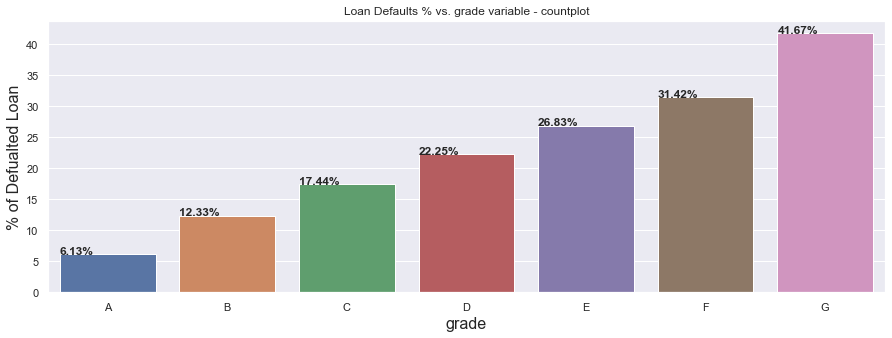

In [460]:
plotBarUnivariate_defualter_ratio_rsorted('grade')

### Findings:
>* We can infer from above that as the grade order moves from A to G the % of loan to defualt almost doubles between each consecitve grade A has 6.14% defulters B had 12.43% defualters Grade 'G' shows the highest % of loan to be defualted.  
>* We can coclude that if the loan was issued at a lower grade there is a higher chance for a loan to be fully paid.  
>* Grade shows a strong effect on loan defualt:  
>>* We will consider this for further analysis :  YES

## Sub_Grade:

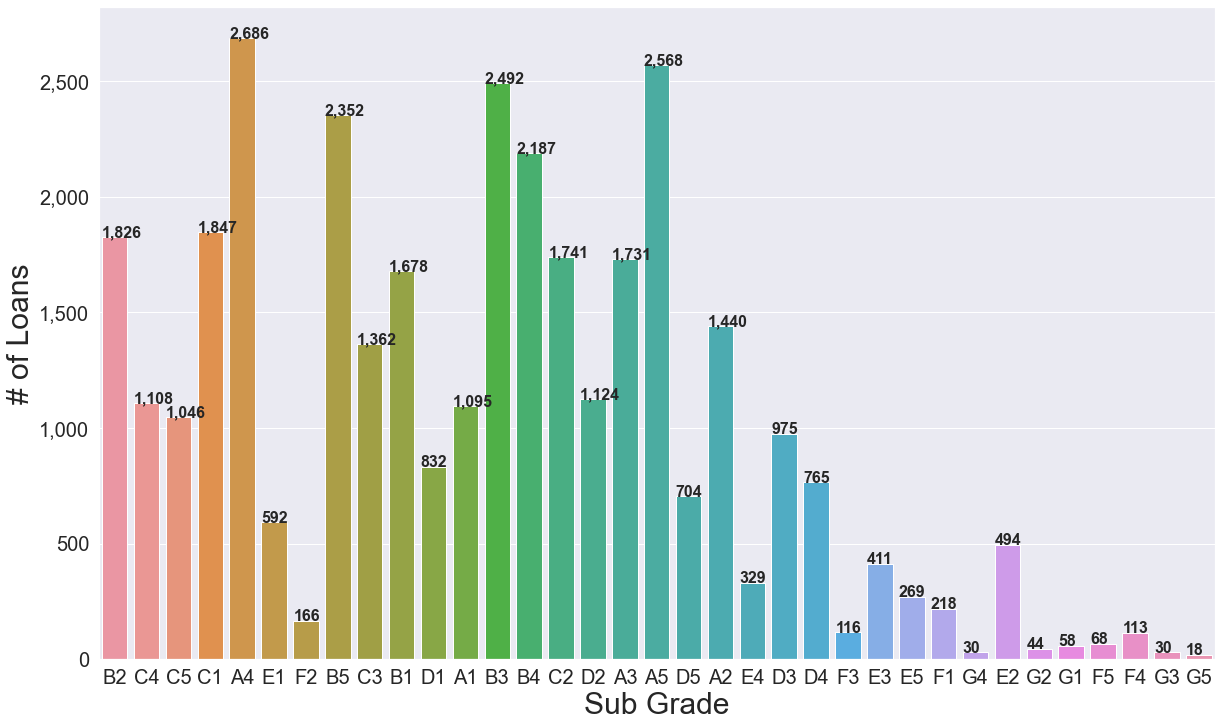

In [461]:
# Plotting grade distribution across the data:
ShowCountPlot(dfinit,'sub_grade','Sub Grade',fsize=(20,12))

### Findings:
>* We can infer that G5 is a minority with only 18 counts in the data set.
>* The group sub_grade with the most count is A4.
>* Most of the loans were issued to subgrades A1 to A5 B1 to B5 and C1 to C5.
>* No pattern detected for sub-grades and # of loans issued 

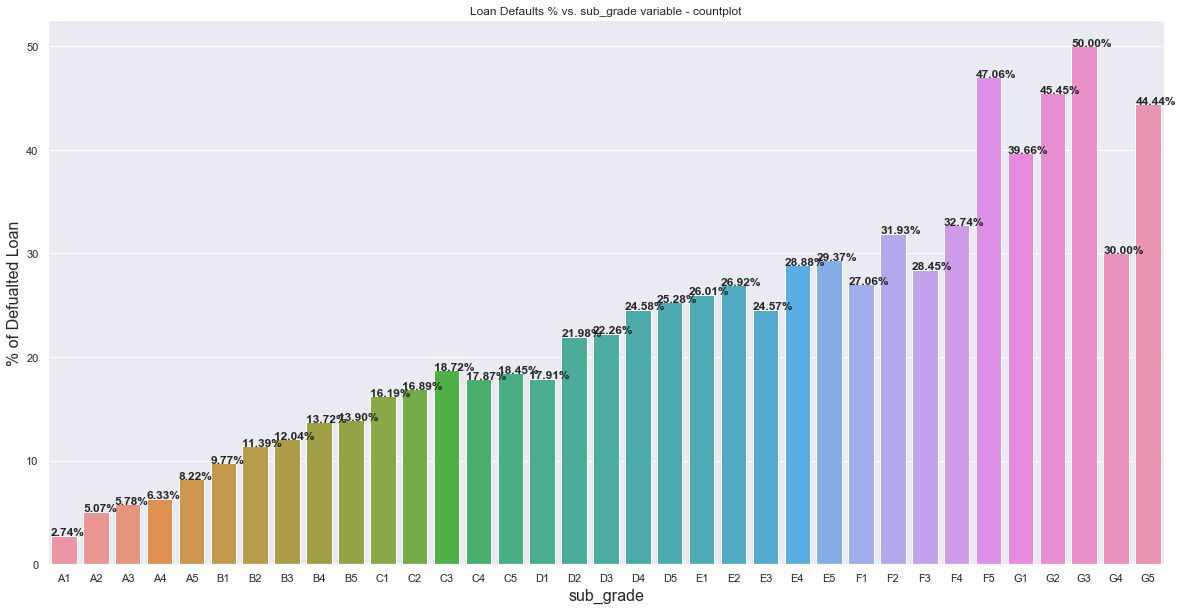

In [462]:
plotBarUnivariate_defualter_ratio_rsorted('sub_grade', figsize=(20,10))

### Findings:
>* We can infer that the chance of a loan to default increases respectively as the sub_grade moves from 1 to 5 for almost all grades except for G grade.
>* G4 shows the lowest % of loan default across its grade G.
>* G3 shows the highest % of a loan to be a default with 50%.
>* sub_grades affect % of loan default.
>>* We will consider this for further analysis: Yes

## Purpose

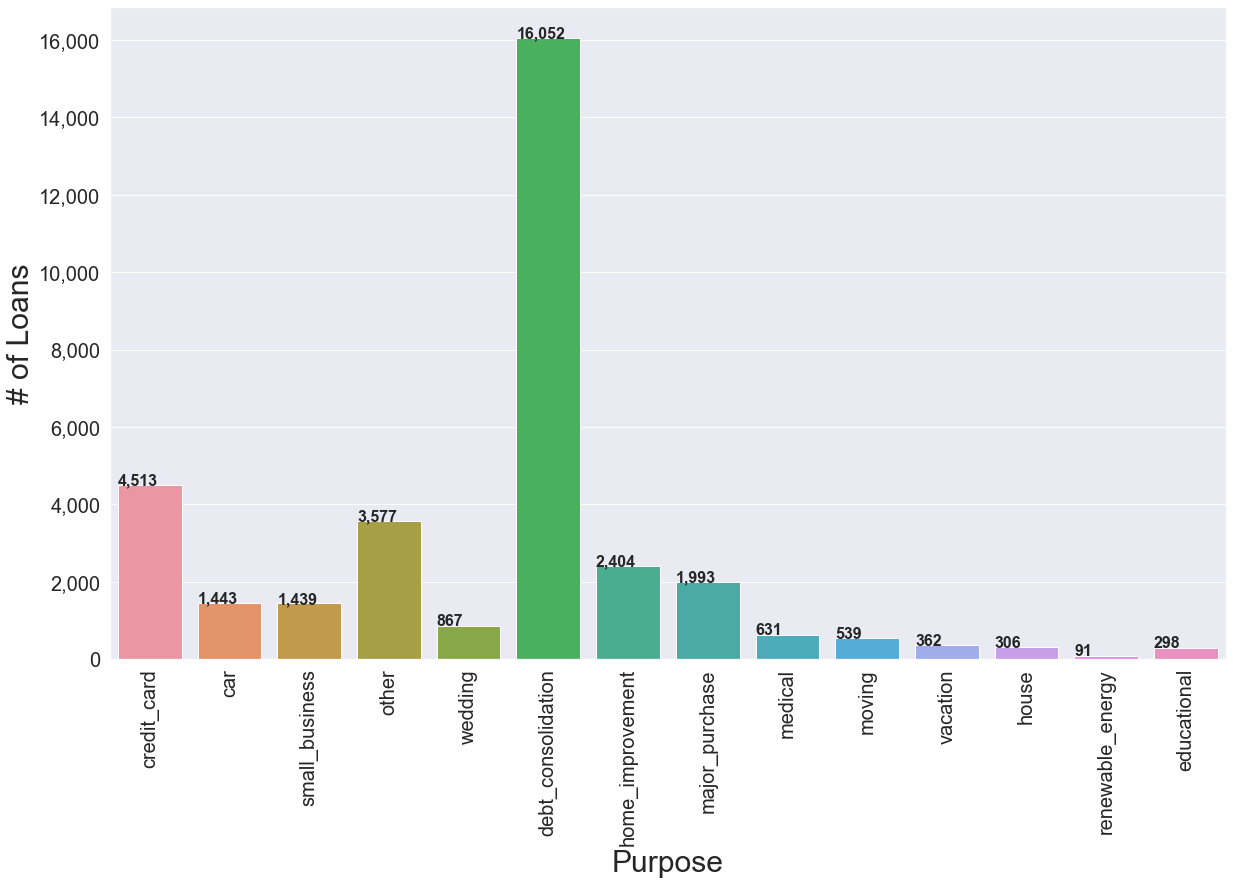

In [463]:
# Plotting Purpose distribution across the dataset:
ShowCountPlot(dfinit,'purpose','Purpose',fsize=(20,12), angl=90) 
PlotPie(dfinit,'purpose','Purpose',fsize=(600,350))



### Findings:
>* We can infer from above that 46.5% of the borrowers took loan for the purpose of debt consolidation:  
>* We can conclude that 53.5% of the data is distributed between 13 different purposes.  
>* The least count goes to loans for the purpose of renewable energy.


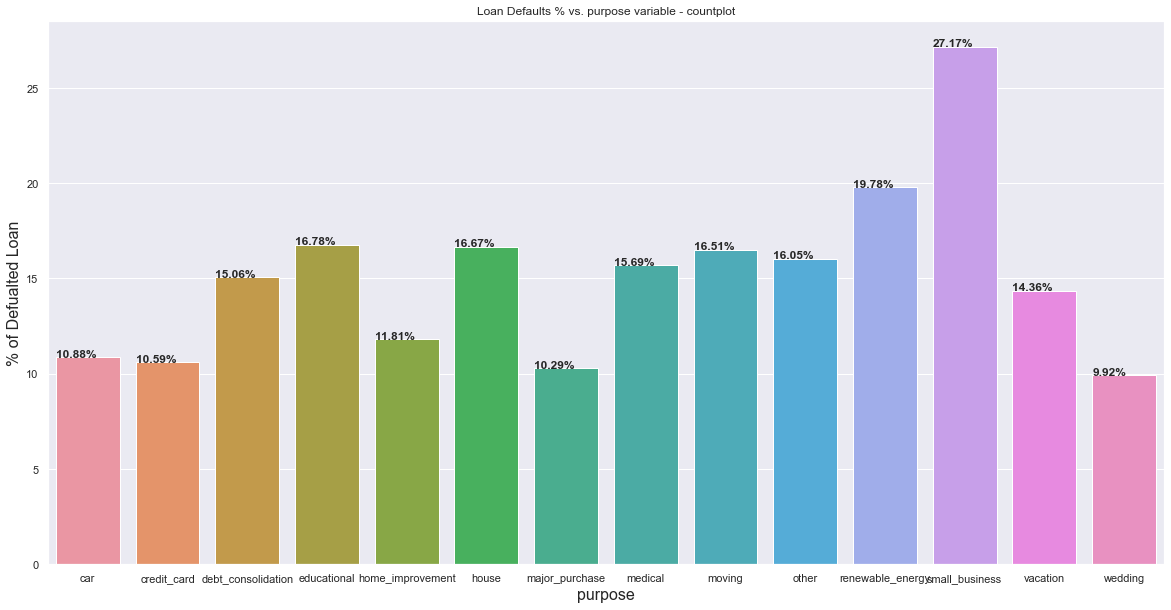

In [464]:
plotBarUnivariate_defualter_ratio_rsorted('purpose', figsize=(20,10))

### Findings:
>* We can infer from above that the puspose which has the highest % of loan defaults is "opening a small business" and the lowest % of loan to default is for weddings:  
>* Based on the data above we can infer approving loans for weddings, car, credit cards is better than approving loans for small business.
>* This could be a reason of small business usually are not well studied and implmented while weddings refer to people planing to start a new life after saving enough money.  
>* Conclusion based on data distribution most of the loans issued are for the purpose of debt consolidation which shows 15.12% of loan default
>* This is a strong variable:  
>>* We will consider this for further analysis :  YES

## Term:

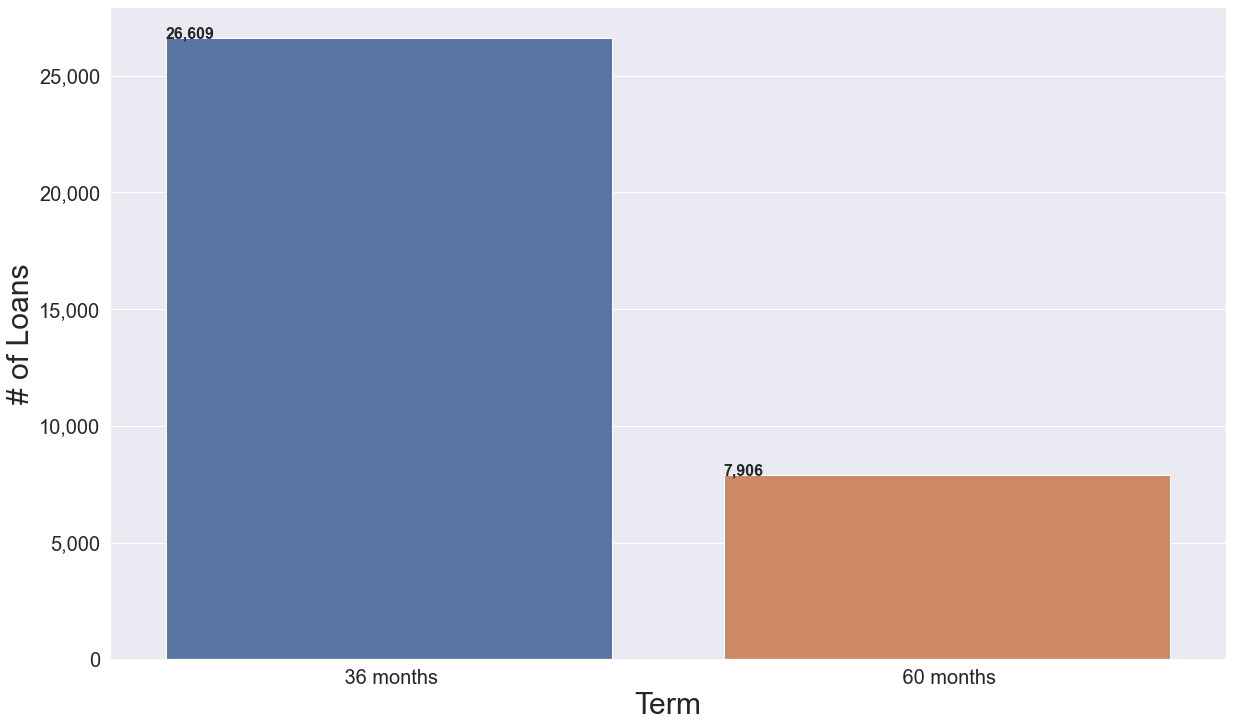

In [465]:
# Plotting Term distribution across the dataset:
ShowPieAndCountPlot(dfinit,'term','Term')

### Findings:
>* We can infer form above that 77.1% of the terms issued are issued on a short term plan of 36 months and only 22.9% where issued on a long term plan of 60 months.  
>* We can conclude that most of the lenders take loans on shorter payment plans as a reason of higher intrest charged on long term plans.

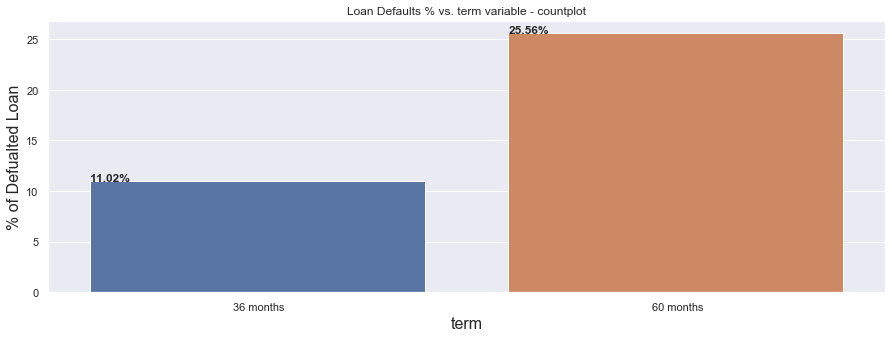

In [466]:
# Plotting term against % of default from Status column:
plotBarUnivariate_defualter_ratio('term')

### Findings:
>* We can infer from above that as the loan term period increases the percentage of a loan to be defaulted increases slightly more than twice comparing 36 month period vs 60 months period: 
>* We can assume the reason behind this is higher intrest rates charged on 60 months plan thus more chance to default.
>>* We will consider this for further analysis: Yes

## dti_range

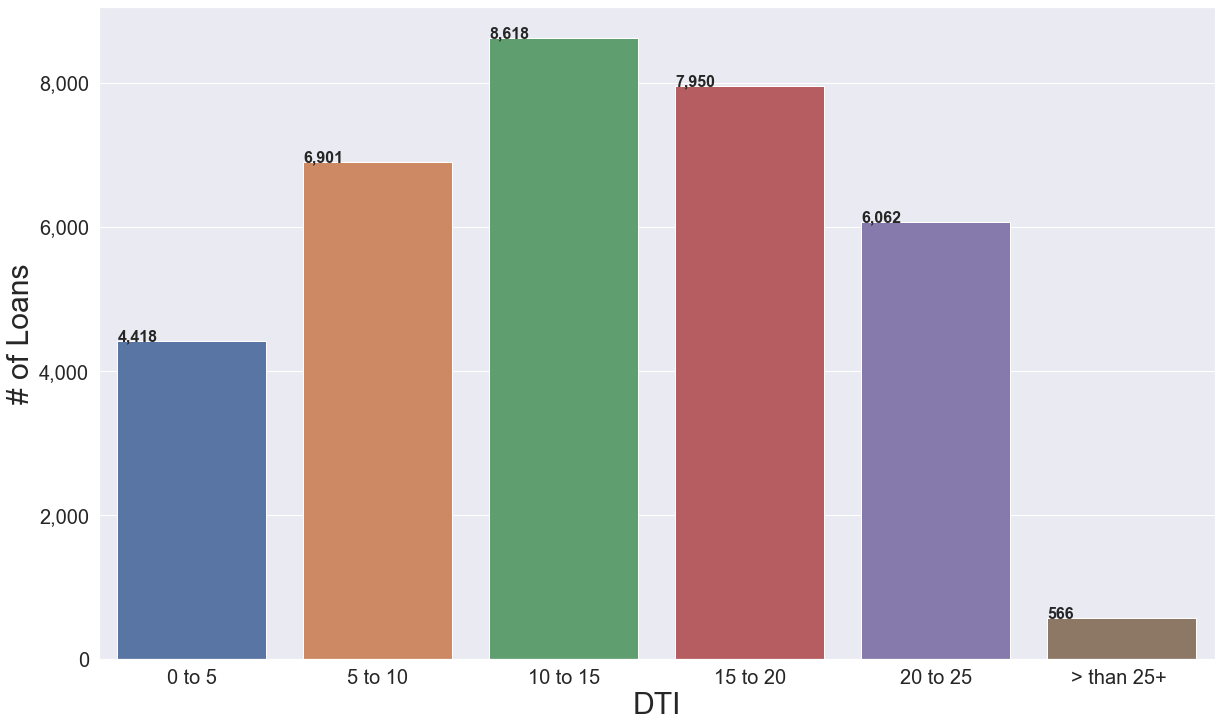

In [467]:
# Plotting Term distribution across the dataset:
ShowPieAndCountPlot(dfinit,'dti_range','DTI')

### Findings:
>* We can infer form above that th Dti ratio is distributed almost equally across the 3 bins with range of 5 - 20 for lenders.  
>* 30% of the dti ratio lies in range of 0-5 and 20-25.  
>* A minority of lenders had a dti ratio of more the 25.

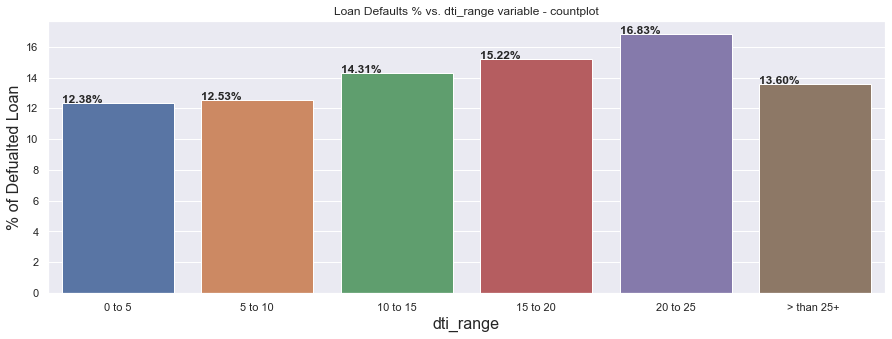

In [468]:
# Plotting dti_range against % of default from Status column:
plotBarUnivariate_defualter_ratio('dti_range')

### Findings:
>* We can infer from above that as the ratio of the borrowes monthly debt payments on the total debt obligations increase the  % of loan to defualt decreases. The lowest % of loan to default between ratios 0 to 10 which is almost 12.6% dfaulter ratio.
>* Based on the data above we can infer that approving loans for dti range between 0 to 10 and 25 and above is better than 15 to 25 as a dti ratio.
>* This is a weak variable:
>>* We will consider this for further analysis to ensure its irrelevant : Yes

## Emp_length

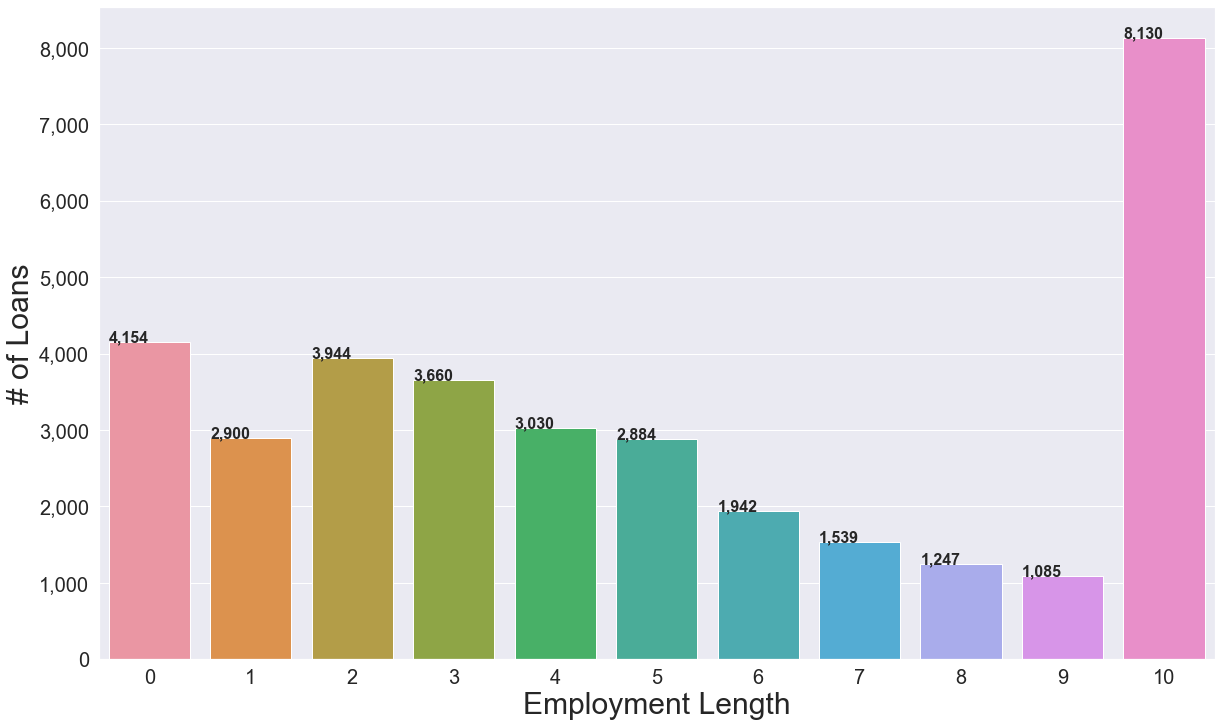

In [469]:
# Plotting emp_length distribution across the dataset:
ShowPieAndCountPlot(dfinit,'emp_length','Employment Length')

### Findings:
>* We can infer from above that most of the borrowers (23.6%) have an employment length of 10 or more years.     
>* Borrowers with 0 to 4 years of employment covers 50% of the loans issued. 
>* 16% of the borrowers had an employment length of 6-9 years which varies respectively from 3.14% to 5.63% of the whole dataset.

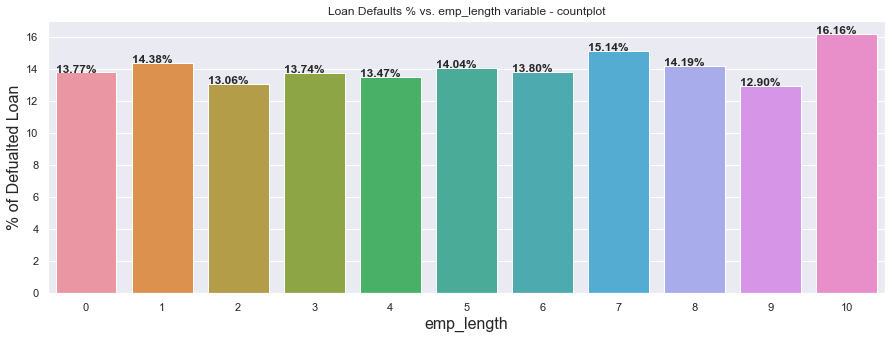

In [470]:
# Plotting emp_length against % of default from Status column:
plotBarUnivariate_defualter_ratio_rsorted('emp_length')

### Findings:
>* We can infer from above across different employment lengths of borrowers from 0 to 10 + the variation of percentage of a loan to be defaulted is 3% . 
>* Slight difference between different years actually employees who spent more than 10 years tend to show highest % of loan to default noting that 23% of the loans issued where issued to this category.
>>* We will consider this for further analysis : Yes

## Verification_Status

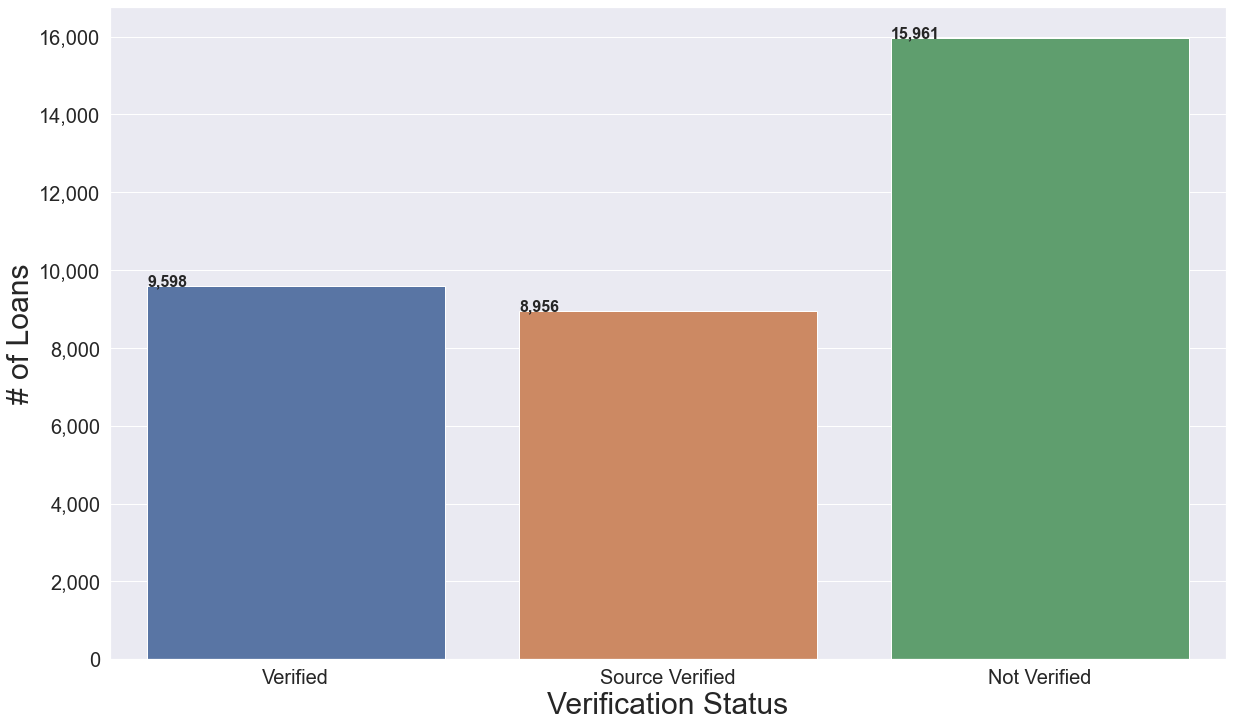

In [471]:
# Plotting emp_length distribution across the dataset:
ShowPieAndCountPlot(dfinit,'verification_status','Verification Status')

### Findings:
>* Almost half of the loans issued were issued to borrowers with incomes not verified.     
>* Quarter of the loans were issued to income source verified customers and 27.8% of the loans were issued to verified income customer.  
>* The plot shows normal distribution we can infer 53.8% of the loan were issued to Verifed Income sources (Source, Verified) and 46.2% were issued to customers with Un-verified income sources.

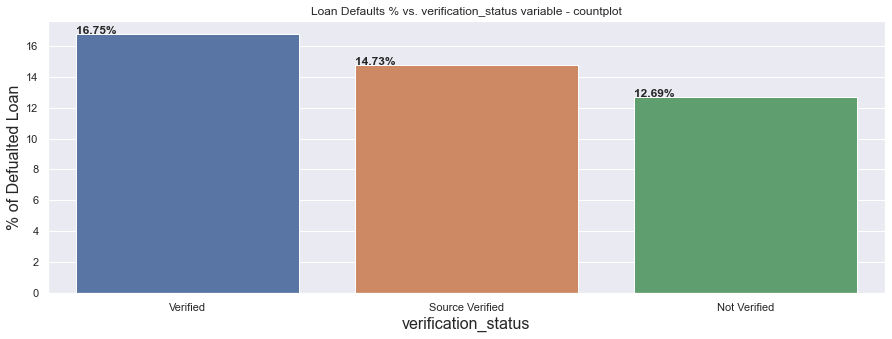

In [472]:
# Plotting 'verification_status' against % of default from Status column:
plotBarUnivariate_defualter_ratio('verification_status')

### Findings:
>* We can infer from above that verification status of income plays a role in % of loan defualts. If the income source is "Verified" the % of loan defualts is the highest (16.81%) respectivly decreasing as "Source verified" and "Not verified sources".
>* Based on the data above we can infer approving loans for income sources that are not verified is better although its not logical lets further analyze:
>* This is a weak variable:
>>* We will consider this for further analysis : Yes

## Annual_Income_Range

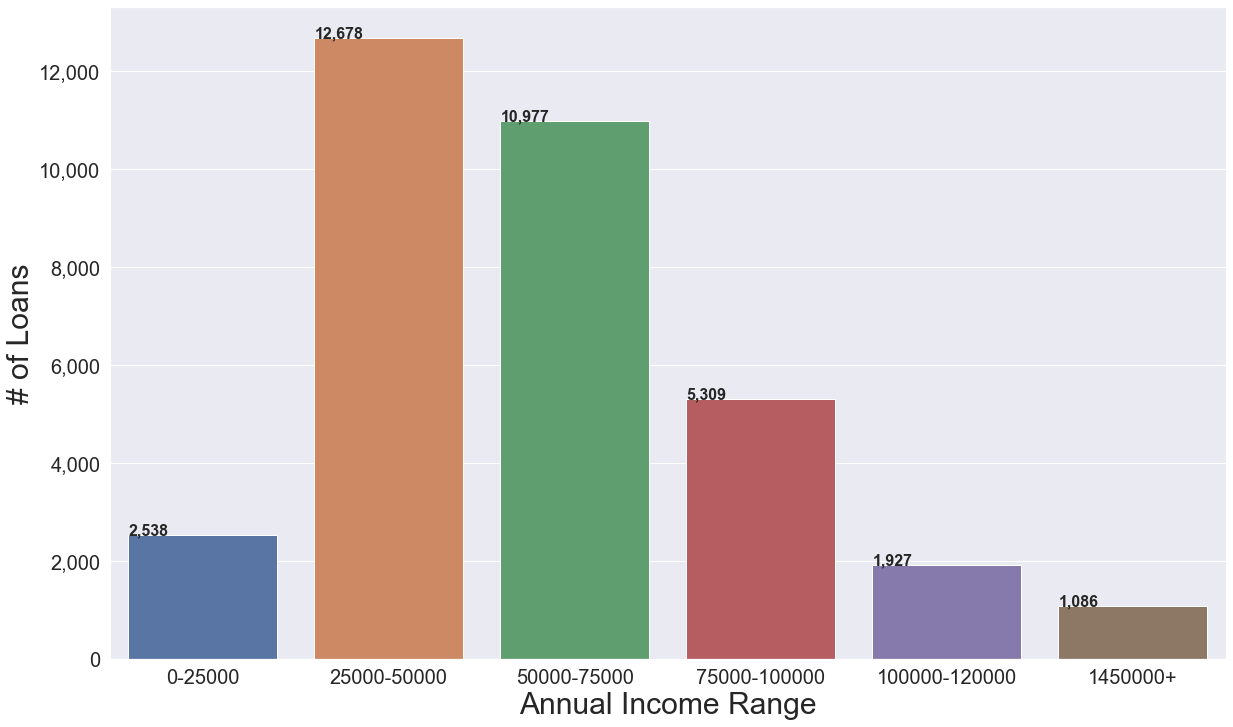

In [473]:
# Plotting anuual_inc_range distribution across the dataset:
ShowPieAndCountPlot(dfinit,'annual_inc_range','Annual Income Range')

### Findings:
>* Almost 37% of the clients make 25k to 50k each year.    
>* 67% of the borrowers annual salary ranges between 25k to 75K
>* 15% of the borrowers have a salary range of 75k to 100k yearly.
>* 7.35% of the clients make less than 25K a year.

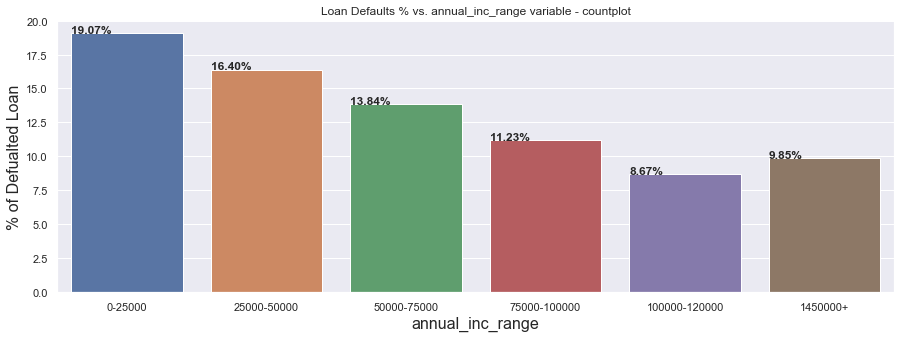

In [474]:
# Plotting 'annual_inc_range' against % of default from Status column:
plotBarUnivariate_defualter_ratio('annual_inc_range')

### Findings:
>* We can infer from above that as the annual income of a borrower increases the % of a loan to default decreases its inverserly propotional. 
>* The higher the income the lower the chance of a loan to defualt:
> More bivariate analysis could represent a better conclusion.
>* This is a strong variable:
>>* We will consider this for further analysis : Yes

## Funded_amnt_inv_range

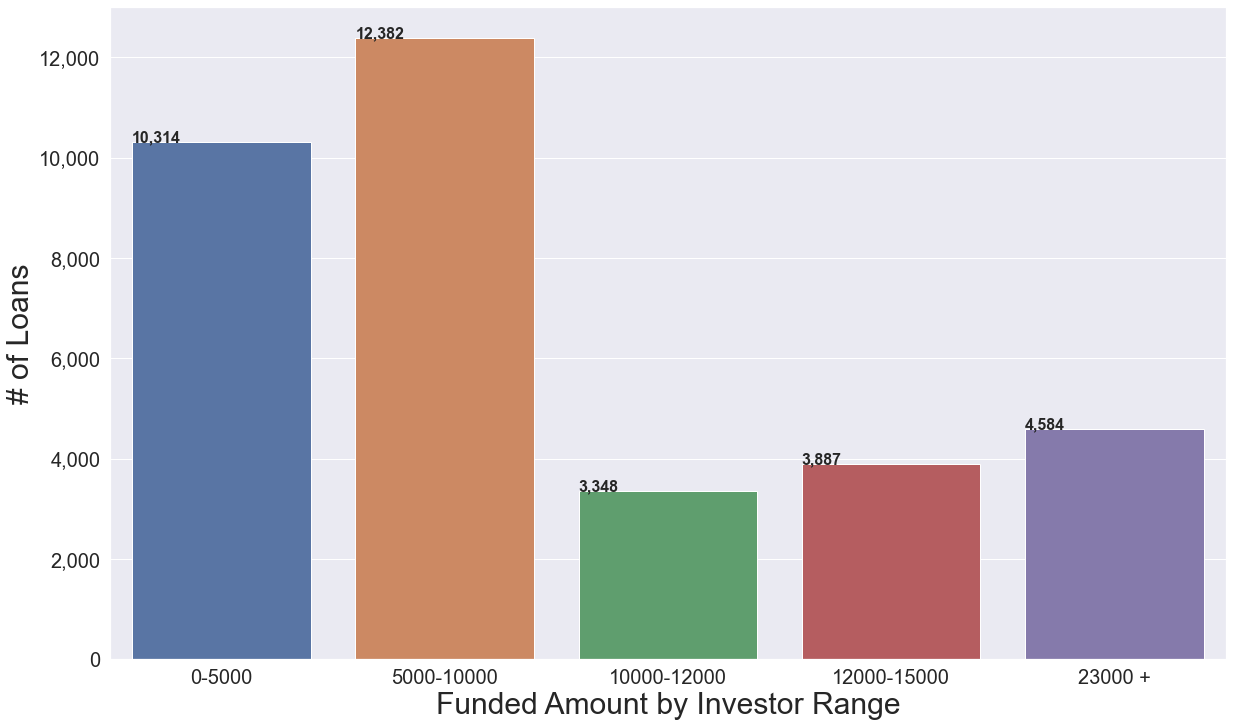

In [475]:
# Plotting funded_amnt_inv_range distribution across the dataset:
ShowPieAndCountPlot(dfinit,'funded_amnt_inv_range','Funded Amount by Investor Range')

### Findings:
>* 65.8% of investors invested from 0 to 10,000   
>* 13.3% of investors lended 23k+ to borrowers.
>* Only 10% of the loans issued range between 10k to 12k.

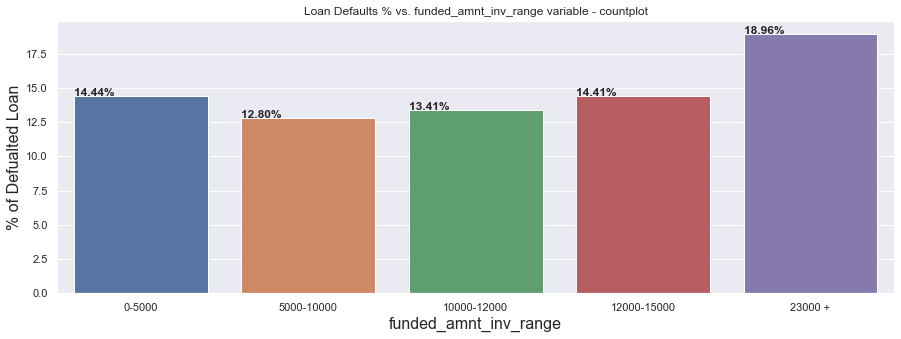

In [476]:
# Plotting bar chart for bins of funded_amnt_inv vs the % of bad loans.
plotBarUnivariate_defualter_ratio('funded_amnt_inv_range')

### Findings:
>* We can infer from above that as the amount approved by investor to borrower increase the chance of a loan to be defaulted increases slightly the higher the amount the higher the rate of defaulted loan. 
>* Amounts above 23,000 shows the highest percentage of defaulted loans 18.96 %:
>>* We will consider this for further analysis: Yes

## int_rate_range

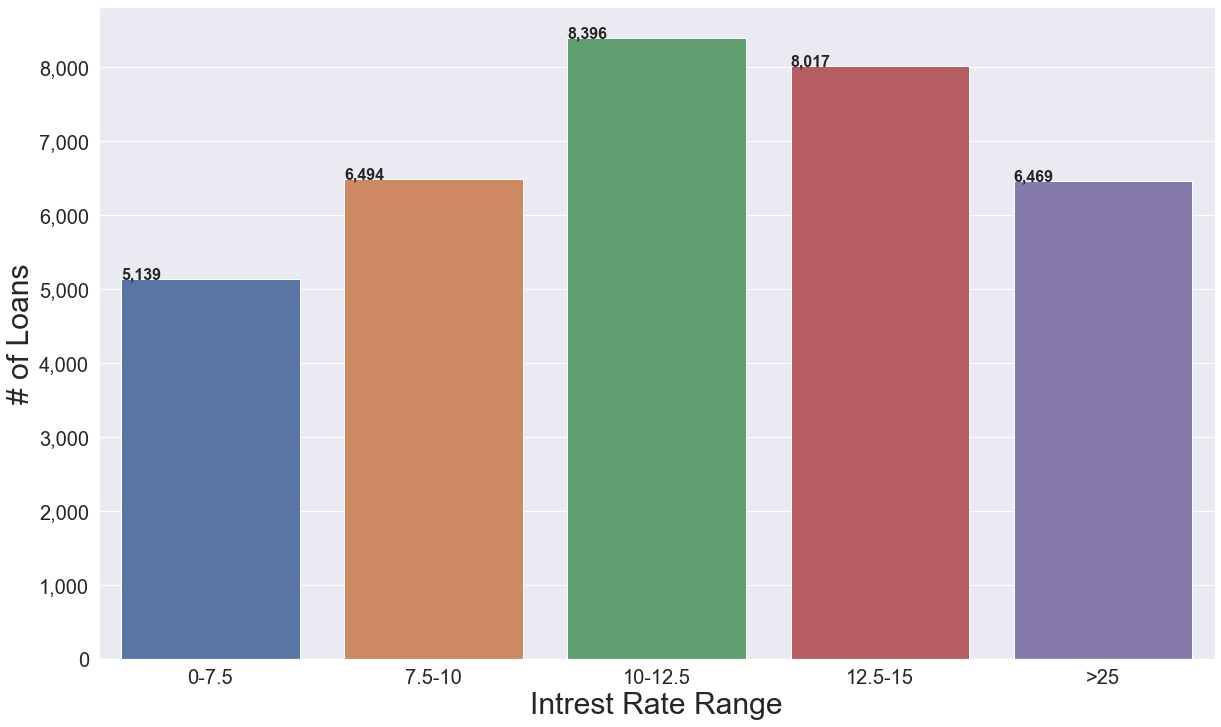

In [477]:
# Plotting int_rate_range distribution across the dataset:
ShowPieAndCountPlot(dfinit,'int_rate_range','Intrest Rate Range')

### Findings:
>* 50% of the loans issued had an intrest rate of 10 to 15%.
>* The maximum intrest rate was 25% and more and it covers 18.7 % of the total loans issued.
>* The lowest intrest charged on loans ranges between 0 to 7.5% and it represent 18.8% if the loans issued.
>* Only 15% of the loans issued had an intrest rate less than 7.5%

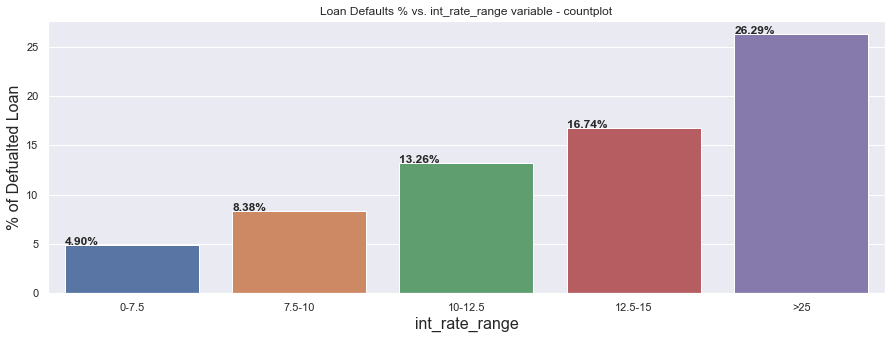

In [478]:
plotBarUnivariate_defualter_ratio('int_rate_range')

### Findings:
>* We can infer from above that as the intrest rate on loan increases the percentage of a loan to be defaulted increases significantly  with almost 4% more between different bins above this shows a positive linear realtion.  
>* The highest % of loan default is for intrest rates above 16% which is almost double the default values for rates of 12.5 to 15% 
>>* We will consider this for further analysis: Yes

## Installment

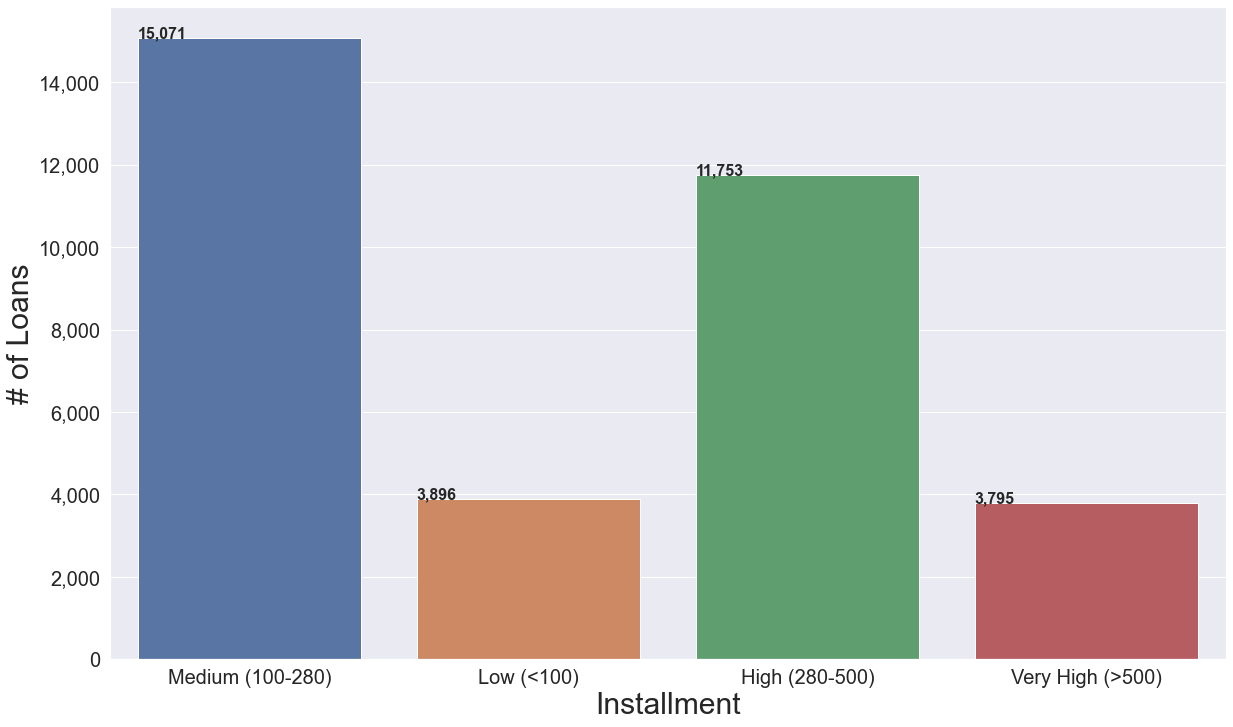

In [479]:
# Plotting installment distribution across the dataset:
ShowPieAndCountPlot(dfinit,'installment','Installment')

### Findings:
>* 44% of the loans issued borrowers had to pay between 100 to 280 USD on monthly basis.
>* More than 75% of the loans issued had mothly payment of 100 USD and above.
>* Only 11% of the clients pay installments of 500 USD and more on monthly baisis.
>* 11.3% of the clients pay less than 100 USD a month.

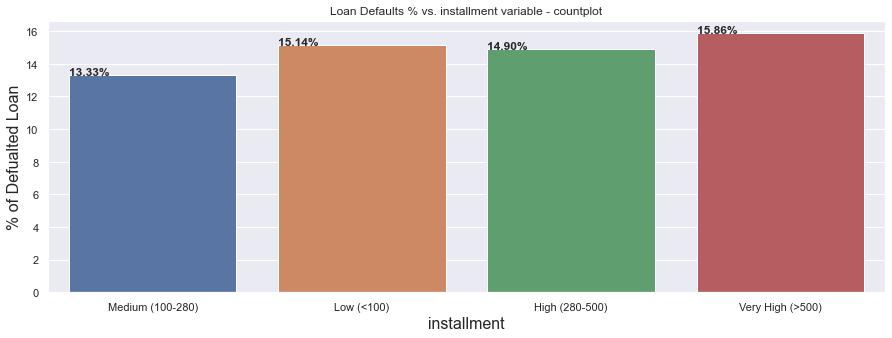

In [480]:
plotBarUnivariate_defualter_ratio('installment')

### Findings:
>* We can infer from above that the installment amount is not a significant factor as all categories show an averge % of loan defualt with range of 2% difference. 
>>* We will not consider this for further analysis: No

# Rank Analysis: For funded_amnt_inv Column

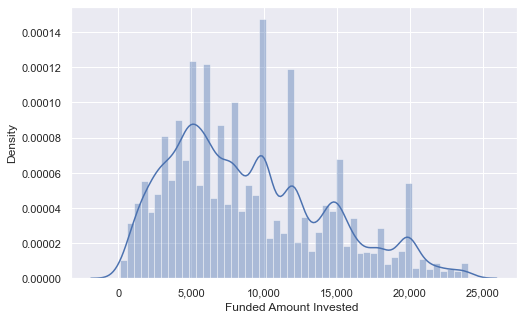

In [481]:
def ShowdistPlot(df,colName,xlbl):
    ax=sns.distplot(df[colName])
    ax.set(xlabel=xlbl, ylabel='Density')
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ShowdistPlot(dfinit,'funded_amnt_inv','Funded Amount Invested ')

### Findings:
>*The data is distributed - there are multiple peaks.

In [482]:
# get the value counts for funded_amnt_inv
colName='funded_amnt_inv'
df2=dfinit[colName].value_counts().reset_index().reset_index()
#rename the columns
df2=df2.set_axis(['Rank','index','Counts'], axis=1, inplace=False)
df2.head()


Rank    index  Counts
0     0   5000.0    1270
1     1  10000.0    1216
2     2   6000.0    1157
3     3  12000.0     977
4     4   8000.0     866

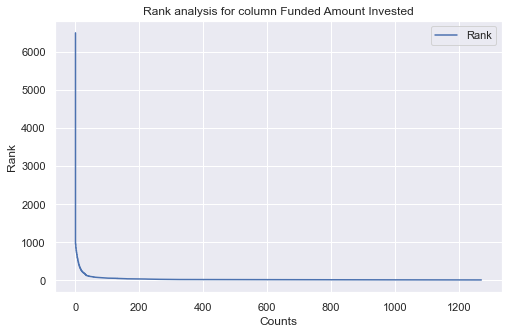

In [483]:
 #Draw the plot
ax=df2.plot(kind='line', x='Counts',y='Rank',title=f'Rank analysis for column Funded Amount Invested')
ax.set_ylabel('Rank')
ax.set_xlabel('Counts')
plt.show()

### Findings:
>* 1. There are few values with higher rank  (0 as the highest rank) as the line is almost verticle from around 0 to 10 counts
>* 2. There are higher number of low rank values as the line is almost flat after around 10 counts

# Bivariate Analysis:

## Default Anaysis

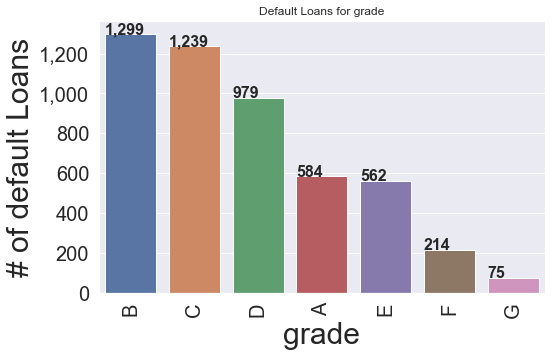

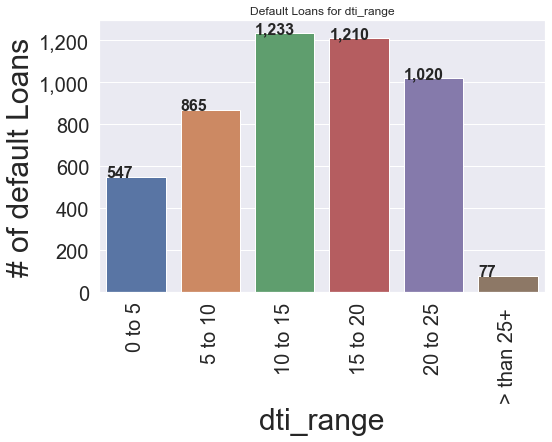

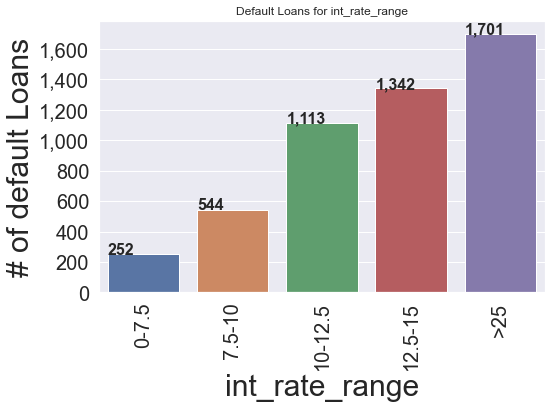

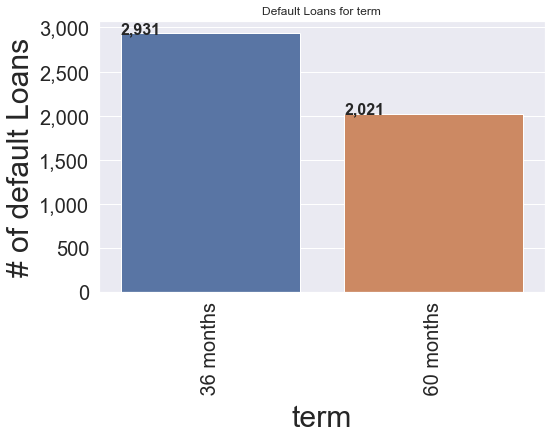

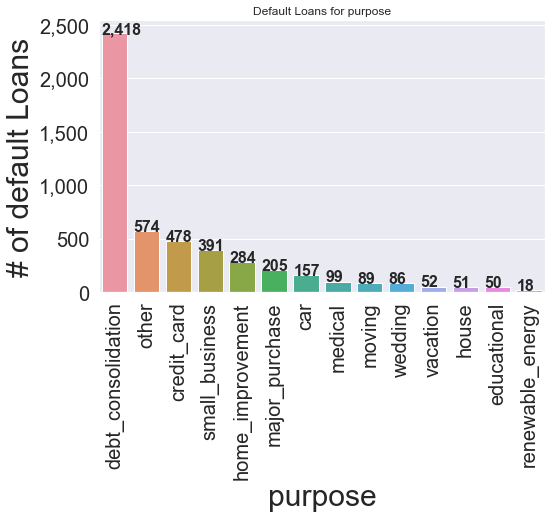

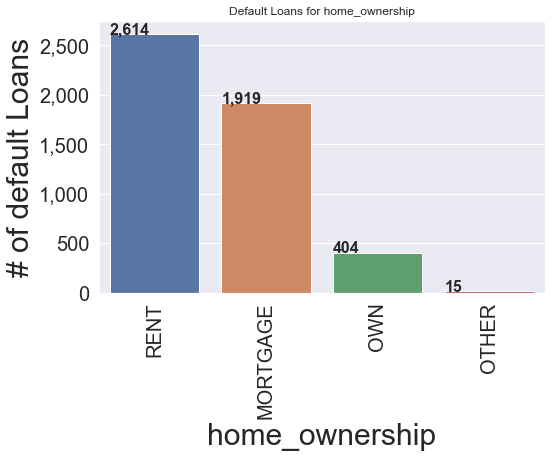

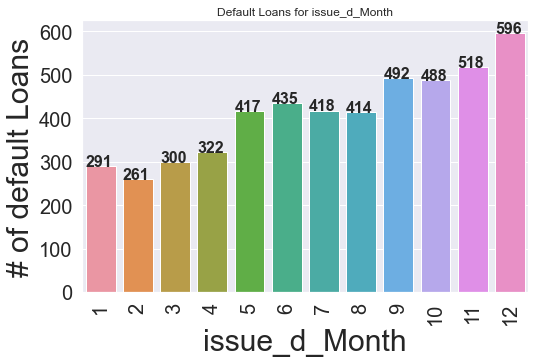

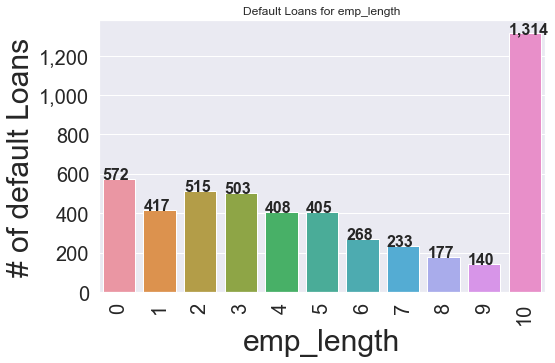

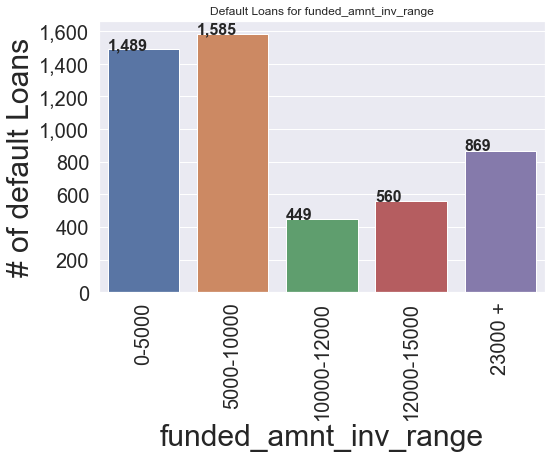

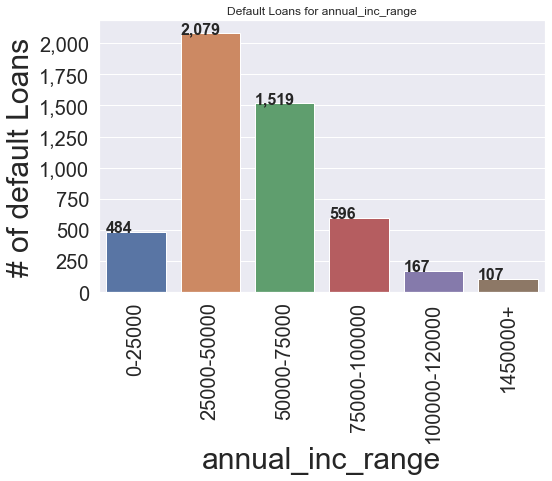

In [484]:
cols=['grade','dti_range','int_rate_range','term','purpose','home_ownership','issue_d_Month','emp_length','funded_amnt_inv_range','annual_inc_range']
for col in cols:
    ShowBadLoanBarGraph(dfinit,col)

### Excluded List:
####  [Issue_d_Month, Issue_d_year, installment, home_ownership]

In [485]:
#doubtful_list=['verification_status','emp_length','dti_range','sub_grade']
#strong _effect=['int_rate_range','funded_amnt_inv_range','annual_inc_range','term','purpose','grade','sub_grade']


## Lets analyze the variables with doubtful effect on loan status default from the analysis above:

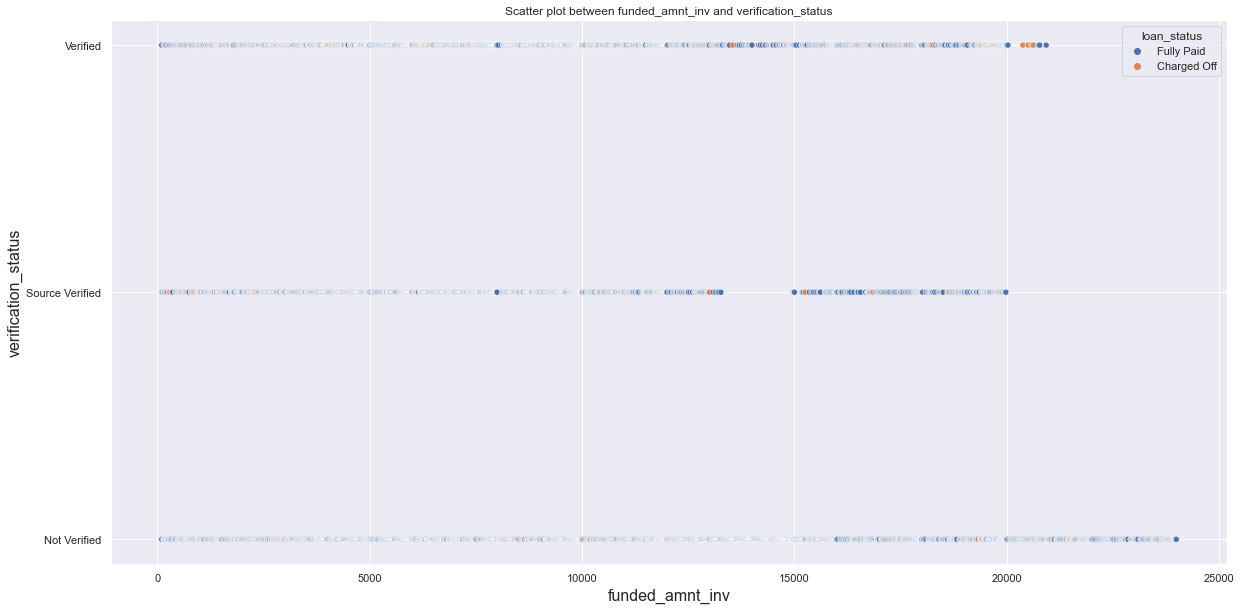

In [486]:
# Plotting a scatter plot to check the corelation between funded_amnt_inv & verification_status column with reference to loan_status
plotscatter_bivariate("funded_amnt_inv","verification_status")

### Findings:
>* No corelation was found between the loan amount invested by investor and the verification source with respect to loan default:
>* As mentioned above the verified source shows the highest count of loan default.
>>* This is not a derivng variable to loan default.

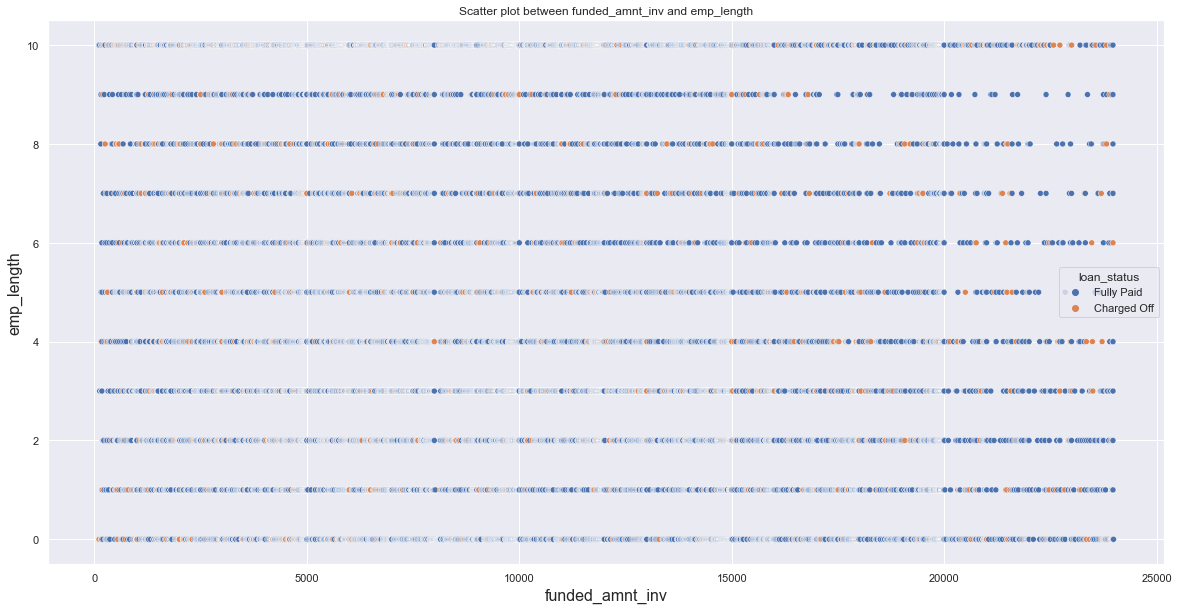

In [487]:
# Plotting a scatter plot to check the corelation between funded_amnt_inv & emp_length column with reference to loan_status
plotscatter_bivariate("funded_amnt_inv","emp_length")

### Findings:
>* No corelation was found between the loan amount invested by investor and the employment length of borrower with respect to loan default:
>* As mentioned earlier in univariate analysis the 10 and more years of employment shows the highest count and % of loan to default.
>>* This is not a derivng variable to loan default.

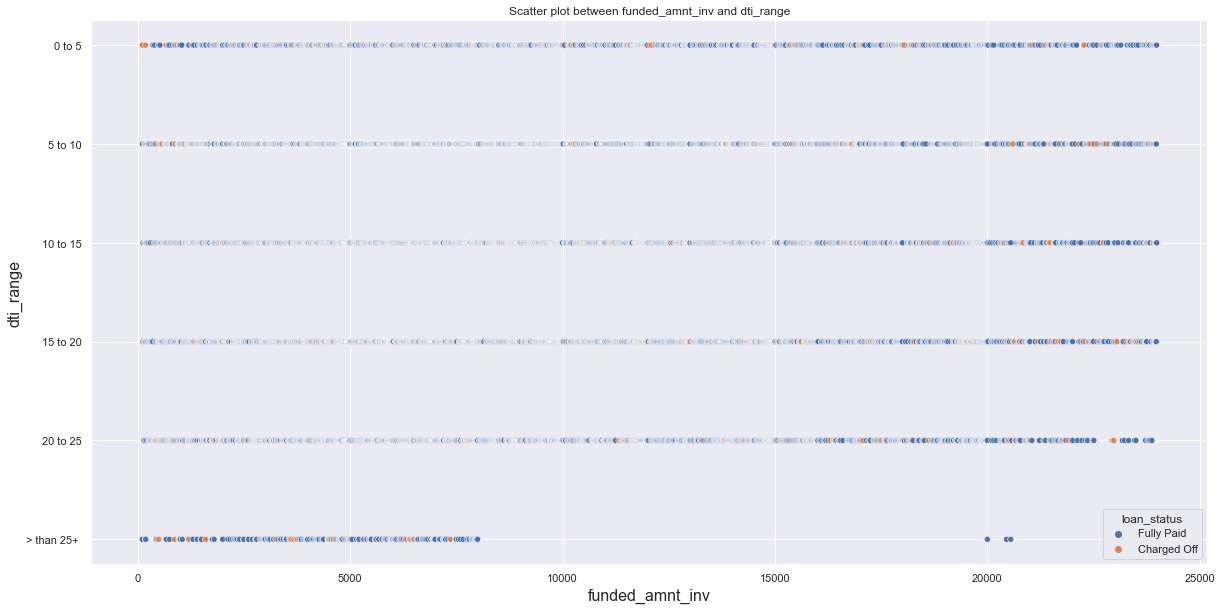

In [488]:
# Plotting a scatter plot to check the corelation between funded_amnt_inv & dti_range column with reference to loan_status
plotscatter_bivariate("funded_amnt_inv","dti_range")

### Findings:
>* No corelation was found between the loan amount invested by investor and the dti ratio of borrower with respect to loan default:
>* As mentioned earlier in univariate analysis % of loan default with respect to different dti range is almost the same across the whole dataset. 
>>* This is not a derivng variable to loan default.

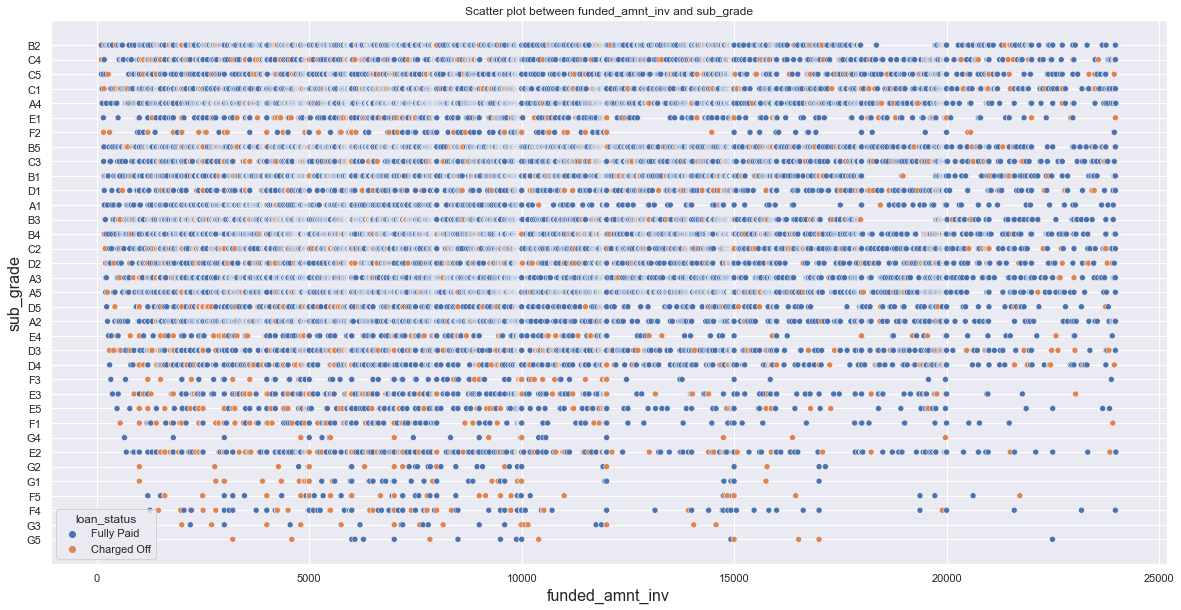

In [489]:
# Plotting a scatter plot to check the corelation between funded_amnt_inv & dti_range column with reference to loan_status
plotscatter_bivariate("funded_amnt_inv","sub_grade")

### Findings:
>* No corelation was found between the loan amount invested by investor and subgrade of borrower with respect to loan default:
>* As mentioned earlier in univariate analysis % of loan default with respect to different dti range is almost the same across the whole dataset. 
>>* This is not a derivng variable to loan default.

In [490]:
## Further analysis to ensure those values are not related

### Lets Analyze the remaining variables 
### ['int_rate_range','funded_amnt_inv_range','annual_inc_range','term','purpose','grade']

## Int_Rate_Bivariate

In [491]:
# Definig the box size and the label for all upcomunig bivariate analyis:
c="% of Bad Loans"
sizeOn='funded_amnt_inv'
def showPlotlyHeading(level1,level2):
    '''
    this function will show the heading on each plotly plot
    value1: the first value
    value2: the 2nd value
    '''
    printmd(f'## Variables {level1} and sublevel {level2}')
    printmd(f'>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans')


In [492]:
a=['int_rate_range']
b=['funded_amnt_inv_range','annual_inc_range','term','purpose','grade','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables int_rate_range and sublevel funded_amnt_inv_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables int_rate_range and sublevel annual_inc_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables int_rate_range and sublevel term

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables int_rate_range and sublevel purpose

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables int_rate_range and sublevel grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables int_rate_range and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.vs. funded_amnt_inv
>* All loans issued with 25% or higher intrest with respect to all varaibles lead to a high percentage of loan default.  
#2 vs. annual income
>* To reduce loss do not issue loans with intrest rate of 12.5% or higher to clients with annual income less than 50k.  
#3. vs. term
>* To reduce loss do not issue long term loans if the loan intrest rate is 10% or higher.  
#4 vs. purpose
>* To reduce loss do not issue loans with intrest rate of 10% or higher for the purpose of small business and education.
>* To reduce loss do not issue loans with intrest rate of 12.5% or higher for the purpose of debt consolidation & renewable energy.  
#5.vs. Grade
>* To reduce loss do not issue loans with high intrest rates above 25%  for loan grades (C to G) as they show a high percentage (24-38%) of loan defaluts:  
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades E1 shows a high percetage of loan default for the loans issued with 25% intrest rate:
Conclusion
>* To conclude and reduce future loss do not issue loans with intrest rate of 25% or higher to any client as it leads to a default.
>>* This is a strong derivng variable to loan default.

## Funded_amnt_inv_range_Bivariate

In [493]:
a=['funded_amnt_inv_range']
b=['int_rate_range','annual_inc_range','term','purpose','grade','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables funded_amnt_inv_range and sublevel int_rate_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables funded_amnt_inv_range and sublevel annual_inc_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables funded_amnt_inv_range and sublevel term

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables funded_amnt_inv_range and sublevel purpose

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables funded_amnt_inv_range and sublevel grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables funded_amnt_inv_range and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all the different amounts funded by investor lead to a high percentage of loan default.
>* To reduce future loss do not issue loans with amounts of 23k or more if the intrest rate is 25% or more.
>* To reduce future loss do not issue loans with amounts of 5k or more if the intrest rate is 12.5% or more.  
#2 vs. annual income
>* To reduce future loss do not issue loans with amounts of 23k or more if the annual income of the client is less than 100K.
>* To reduce future loss do not issue loans with amounts of 5k or more if the annual income of the client is less than 25K.   
#3. vs. term
>* To reduce future loss do not issue any long term loans (60 months) in any amount.   
#4 vs. purpose
>* To reduce future loss do not issue loans with amounts of 23k or more for the purpose vacation, small business and debt consolidation.
>* To reduce future loss do not issue loans with amounts of 5k or more for the purpose small business.  
#5.vs. Grade
>* To reduce future loss do not issue loans with amounts of 23k or more for loan grades (C to E) 
>* To reduce future loss do not issue loans for loan grades (E to F).   
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades G5 shows the highest percetage of loan default for the loans issued with 25% intrest rate:
Conclusion
>* To conclude and reduce future loss do not issue loans with amounts greater than 23k unless the intrest rate is less than 25% ,the annual income is more than 100K, the loan purpose is not vacation, small business and debt consolidation, and the loan grades are between A&B.
>>* This is a strong derivng variable to loan default.

## Annual_inc_range_Bivariate

In [494]:
# Running a bivariate analysis on annual_inc_range column:
a=['annual_inc_range']
b=['int_rate_range','funded_amnt_inv_range','term','purpose','grade','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables annual_inc_range and sublevel int_rate_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables annual_inc_range and sublevel funded_amnt_inv_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables annual_inc_range and sublevel term

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables annual_inc_range and sublevel purpose

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables annual_inc_range and sublevel grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables annual_inc_range and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.annul_inc.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all the different annual incomes of clients lead to a high percentage of loan default.  
#2 vs. funded_inv_amnt
>* To reduce future loss do not issue loans with amounts of 23k or more if the client annual income is less than 100K.
>* To reduce future loss do not issue loans with amounts of 5k or more if the if the client annual income is less than 25K.  
#3. vs. term
>* To reduce future loss do not issue any long term loans (60 months) with reference to any client annual income.   
#4 vs. purpose
>* To reduce future loss do not issue loans for the purpose of debt consolidation, credit card and medical if the clients annual income is less than 50K.
>* To reduce future loss do not issue loans for the purpose of renwable energy, small business if the clients annual income is less than 100K.
#5.vs. Grade
>* To reduce future loss do not issue loans for clients with annual income less 100K than for loan grades (E to F)   
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades:
>* To conclude and reduce future loss do not issue loans with for clients with annual income less than 100K
>>* This is a strong derivng variable to loan default.

## term_Bivariate

In [495]:
# Running a bivariate analysis on annual_inc_range column:
a=['term']
b=['int_rate_range','funded_amnt_inv_range','annual_inc_range','purpose','grade','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables term and sublevel int_rate_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables term and sublevel funded_amnt_inv_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables term and sublevel annual_inc_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables term and sublevel purpose

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables term and sublevel grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables term and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.term.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all the different terms length (36 or 60 months) lead to a high percentage of loan default.      
#2 vs. funded_inv_amnt
>* To reduce future loss do not issue any long term loans (60 months) in any amount.    
#3. vs. annual_inc
>* To reduce future loss do not issue short term loans (36 months) if the client annual income is less than 25K. 
>* To reduce future loss do not issue long term loans (60 months) with reference to any client income.
#4 vs. purpose
>* To reduce future loss do not issue long term loans for the purpose of debt consolidation, credit card, medical, house , vacation, educational, major purchases and other.
>* To reduce future loss do not issue short term loans for the purpose of small business.      
#5.vs. Grade
>* To reduce future loss do not issue long term loans for loan grades (B to F) 
>* To reduce future loss do not issue short term loans for loan grades (F&G)   
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades:
>* To conclude and reduce future loss do not issue long term loans with a period of 60 months.
>>* This is a strong derivng variable to loan default.

## Purpose_Bivariate

In [496]:
# Running a bivariate analysis on annual_inc_range column:
a=['purpose']
b=['int_rate_range','funded_amnt_inv_range','annual_inc_range','term','grade','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables purpose and sublevel int_rate_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables purpose and sublevel funded_amnt_inv_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables purpose and sublevel annual_inc_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables purpose and sublevel term

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables purpose and sublevel grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables purpose and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.purpose.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all the purposes lead to a high percentage of loan default. >* To reduce future loss do not issue loans for the purpose of small business unless the intrest rate is less than 7.5% otherwise high % of default loans will appaear.    
#2 vs. funded_inv_amnt
>* To reduce future loss do not issue loans with amounts of 23k or more for the purpose vacation, small business and debt consolidation.   
>* To reduce future loss do not issue loans with amounts of 12k or more for the purpose education.
#3. vs. annual_inc
>* To reduce future loss do not issue loans for the purpose of debt consolidation, credit card and medical if the clients annual income is less than 50K.
>* To reduce future loss do not issue loans for the purpose of renwable energy, small business if the clients annual income is less than 100K.  
#4 vs. term
>* To reduce future loss do not issue long term loans for the purpose of debt consolidation, credit card, medical, house , vacation, educational, major purchases and other.
>* To reduce future loss do not issue short term loans for the purpose of small business.        
#5.vs. Grade
>* To reduce future loss do not issue loans for the purpose of small business for loan grades (B to F) 
>* To reduce future loss do not issue loans for the purpose of others, debt consolidation, educational etc.. for  loan grades (C to F)       
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades:
>* To conclude and reduce future loss do not issue loans for the purpose of debt consolidation if the loan grade is between (C to F).
>>* This is a derivng variable to loan default.

## Grade_Bivariate

In [497]:
# Running a bivariate analysis on annual_inc_range column:
a=['grade']
b=['int_rate_range','funded_amnt_inv_range','annual_inc_range','purpose','term','sub_grade']
for level1 in a:
    for level2 in b:
        if level1 !=level2:
            showPlotlyHeading(level1,level2)
            drawplotly(dfinit,[px.Constant("All"), level1,level2],
                           sizeOn,c,c)
            plt.show()

## Variables grade and sublevel int_rate_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables grade and sublevel funded_amnt_inv_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables grade and sublevel annual_inc_range

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables grade and sublevel purpose

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables grade and sublevel term

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Variables grade and sublevel sub_grade

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

### Findings:

1.grade.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all loan grades lead to a high percentage of loan default.   >* Most of the loans issued with 25% or higher have a loan grade ranging (C to G)  
#2 vs. funded_inv_amnt
>* To  reduce future loss do not issue loans for grades(E to G) for all invested fund_amnt_inv.
>*Loan grades f-g shows high % of loan defaults     
#3. vs. annual_inc
>* To  reduce future loss do not issue loans for grades(E to G) for all clients annual income ranges. 
>* To reduce future loss do not issue loans for people with annual inc less than 100k on grades E to G.
#4 vs. purpose
>* To reduce future loss do not issue loans for the purpose of debt consolidation, credit card, medical, house , vacation, educational and other for loan grades (E to F  
>* To reduce future loss do not issue short term loans for the purpose of small business.        
#5.vs. Grade
>* To reduce future loss do not issue loans for the purpose of small business for loan grades (B to F) 
>* To reduce future loss do not issue loans for the purpose of others, debt consolidation, educational etc.. for  loan grades (C to F)          
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades:
>* To conclude and reduce future loss do not issue loans for the purpose of debt consolidation if the loan grade is between (C to F).
>>* This is a derivng variable to loan default.

### Findings:

1.term.vs. int_rate
>* All loans issued with 25% or higher intrest with respect to all the different terms length (36 or 60 months) lead to a high percentage of loan default.      
#2 vs. funded_inv_amnt
>* To reduce future loss do not issue any long term loans (60 months) in any amount.    
#3. vs. annual_inc
>* To reduce future loss do not issue short term loans (36 months) if the client annual income is less than 25K. 
>* To reduce future loss do not issue long term loans (60 months) with reference to any client income.  
#4 vs. purpose
>* To reduce future loss do not issue long term loans for the purpose of debt consolidation, credit card, medical, house , vacation, educational and other.
>* To reduce future loss do not issue short term loans for the purpose of small business.        
#5.vs. Grade
>* To reduce future loss do not issue long term loans for loan grades (B to F) 
>* To reduce future loss do not issue short term loans for loan grades (F&G)   
#6.vs. sub_grade
>* All sub grades show similar behaviour to grades:
>* To conclude and reduce future loss do not issue long term loans with a period of 60 months.
>>* This is a strong derivng variable to loan default.

In [498]:
### emp_length shows that all employess with 10+ years of experience are funded larger amount by investors
level1= 'funded_amnt_inv_range'
level2= 'emp_length'

showPlotlyHeading(level1,level2)
drawplotly(dfinit,[px.Constant("All"), level1,level2],
               sizeOn,c,c)
plt.show()


## Variables funded_amnt_inv_range and sublevel emp_length

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

In [499]:
### 
level1= 'dti_range'
level2= 'emp_length'

showPlotlyHeading(level1,level2)
drawplotly(dfinit,[px.Constant("All"), level1,level2],
               sizeOn,c,c)
plt.show()


## Variables dti_range and sublevel emp_length

>Please note the size of the box is based on the funded_amnt_inv value and color is based on the % of bad loans

## Multivariate analysis:

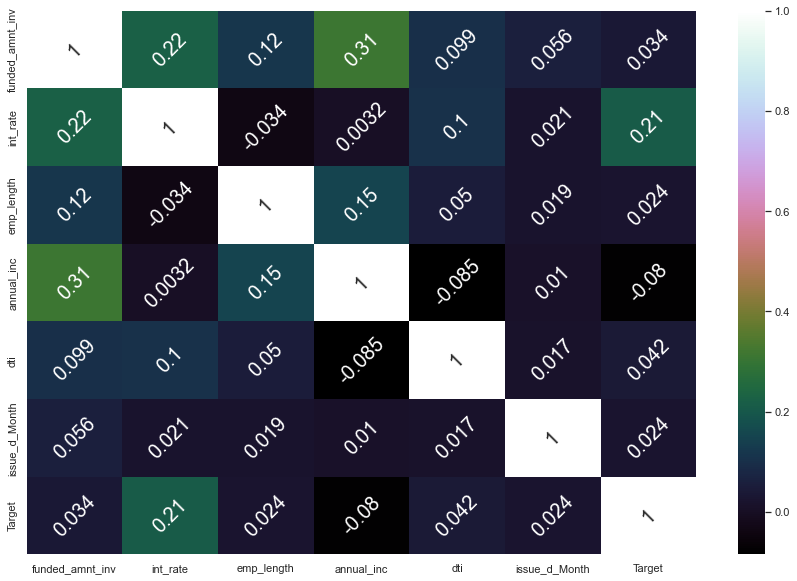

In [505]:
#creat the sublist for correlation
cols=['funded_amnt_inv',  'int_rate', 'installment',
      'emp_length', 'annual_inc',
        'dti'
       ,  'Target']
# Checking correlation between numerical variables - using heatmap to visualise it.
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(dfinit[cols].corr(),annot=True,cmap=("cubehelix"), annot_kws={'size': 20, 'rotation': 45})


### Findings:
>* We can infer from the above heatmap that their is a positve corelation between funded_amnt_inv and (annual_inc, int_rate, issue_d_Year) 
>* We can conclude that as the annual income of a borrower increase the investor is more willingly to fund more money as well as to charge higher intrest rate.

In [381]:
print ('Thanks!')

Thanks!<> 
